# Final project
# Part 1: Motivation

- **What is your dataset?**

    The data used consists of different datasets and data retrieved on internet. The main part of the final dataset is made by preprocessing and concatenating four different datasets. These four datasets are the records of the taxi trip in New York City. In particular, the final dataset consists of the trips of the yellow and the boro (green) (https://www.new-york-city-travel-tips.com/green-cab-new-york-boro-taxi/) taxi for the years 2019 and 2020. In addition, also the records for the fhv (https://www1.nyc.gov/site/tlc/businesses/for-hire-vehicles.page) was downloaded but then discarded in the preprocessing for different reasons explained throughout the notebook. Finally, the data available is also the hourly weather in NYC for 2019 and 2020.
    

- **Why did you choose this/these particular dataset(s)?**

    The idea of choosing these datasets came up while checking the different datasets in the city databases. We wanted to study something different from the crimes, complaints or crashes and at the same time we wanted some data large enough to have meaningful results. We therefore discarded the databases related to the fauna, the air or water pollution that have relatively few rows. After these process of selection, these datasets were the most interesting, especially with the coronavirus variable. In fact, we want to study if there has been any changes during in the patterns of taxi trips during the corona period .  
    

- **What was your goal for the end user's experience?**

    The goal for the end user's experience is to enable them to visualise and analyse on their own the possible changes in taxi-taking patterns that can be seen from the peri-Covid-19 period, and how the decisions taken by the government had impacted the trips. In particular, on the website, the user is able to select different features such as average distances, pick-up and drop-off locations and amount paid and visualize them for a particular type of taxi or all taxis. Moreover, two visualization types are available: a spatial one using a choropleth map and temporal one using histograms and line plots. Finally, the selection of individual features and the type of the visualization is up to the user, but some comments and some points of interests are provided to guide the user in the most important aspects of the story.    
    
    
# Part 2: Basic stats

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import pickle
import numpy as np
import json
import plotly.express as px
from datetime import datetime, timedelta
from IPython.display import HTML, display
from scipy.stats import pearsonr

We started with different datasets for the yellow, green and FHV taxis.

In this first part of the analysis, we are going to preprocess them in order to arrive to the final version that we will use for further analysis.

### Cleaning of the Green dataset

In [ ]:
# Read data from files
Green20 = pd.read_csv('20_Green.csv')
Green19 = pd.read_csv('19_Green.csv')

C:\Users\loren\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
#Concatenation of the datasets from 2019 and 2020
Green = pd.concat([Green19, Green20])
Green.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,02/01/2019 12:02:16 AM,02/01/2019 12:24:37 AM,N,1.0,66,36,1.0,4.46,17.5,0.5,0.5,3.76,0.0,NaN,0.3,22.56,1.0,1.0,0.0
1,2.0,02/01/2019 12:37:19 AM,02/01/2019 12:43:07 AM,N,1.0,255,112,1.0,1.26,6.0,0.5,0.5,1.46,0.0,NaN,0.3,8.76,1.0,1.0,0.0
2,1.0,02/01/2019 12:10:10 AM,02/01/2019 12:12:21 AM,N,1.0,75,238,1.0,0.70,4.0,0.5,0.5,0.00,0.0,NaN,0.3,5.30,2.0,1.0,0.0
3,2.0,02/01/2019 12:26:19 AM,02/01/2019 12:37:58 AM,N,1.0,265,248,3.0,6.51,19.5,0.5,0.5,0.00,0.0,NaN,0.3,20.80,2.0,1.0,0.0
4,2.0,02/01/2019 12:59:41 AM,02/01/2019 01:04:06 AM,N,1.0,82,83,1.0,1.01,5.5,0.5,0.5,2.04,0.0,NaN,0.3,8.84,1.0,1.0,0.0


Firstly, we will process the information about the dates and hours to make them more tractable.

In [ ]:
#Transformation of the dates in datetime and changing AM/PM time format to 24h format
Green['pickup_date']= pd.to_datetime(Green['lpep_pickup_datetime'].astype(str).str[0:10], errors='coerce')
Green['dropoff_date']= pd.to_datetime(Green['lpep_dropoff_datetime'].astype(str).str[0:10], errors='coerce')
Green['pickup_Time']= pd.to_datetime(Green['lpep_pickup_datetime'].astype(str).str[11:], format='%I:%M:%S %p',errors='coerce')
Green['dropoff_Time']= pd.to_datetime(Green['lpep_dropoff_datetime'].astype(str).str[11:], format='%I:%M:%S %p',errors='coerce')
Green['pickup_Time'] =pd.to_datetime( Green['pickup_Time'].dt.strftime('%H:%M:%S'), errors='coerce')
Green['dropoff_Time'] = pd.to_datetime(Green['dropoff_Time'].dt.strftime('%H:%M:%S'), errors='coerce')

In [ ]:
#Saving the information of the year, day of week and month in different columns
Green['Month'] = Green['pickup_date'].dt.month
Green['Year'] = Green['pickup_date'].dt.year
Green['Day'] = Green['pickup_date'].dt.day
Green['Day_of_week'] = Green['pickup_date'].dt.strftime('%A')

In [ ]:
#Saving the information about the pick up and drop off hour, without taking into account the minutes and seconds
Green['pickup_hour'] = Green['pickup_Time'].dt.hour
Green['dropoff_hour']= Green['dropoff_Time'].dt.hour

In [ ]:
#Drop all the columns that are not relevant for our analysis
Green= Green.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'VendorID','RatecodeID','congestion_surcharge','improvement_surcharge', 'ehail_fee', 'mta_tax', 'tolls_amount', 'trip_type', 'extra', 'pickup_Time','dropoff_Time'])
Green["type"] = "green"
Green.head()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,pickup_date,dropoff_date,Month,Year,Day,Day_of_week,pickup_hour,dropoff_hour,type
0,66,36,1.0,4.46,17.5,3.76,22.56,1.0,2019-02-01,2019-02-01,2,2019,1,Friday,0,0,green
1,255,112,1.0,1.26,6.0,1.46,8.76,1.0,2019-02-01,2019-02-01,2,2019,1,Friday,0,0,green
2,75,238,1.0,0.70,4.0,0.00,5.30,2.0,2019-02-01,2019-02-01,2,2019,1,Friday,0,0,green
3,265,248,3.0,6.51,19.5,0.00,20.80,2.0,2019-02-01,2019-02-01,2,2019,1,Friday,0,0,green
4,82,83,1.0,1.01,5.5,2.04,8.84,1.0,2019-02-01,2019-02-01,2,2019,1,Friday,0,1,green


In [ ]:
#Check the number of Nan in the Pick up locationID
print("Number of Nan in the Pick up LocationID", Green['PULocationID'].isna().sum())

Number of Nan in the Pick up LocationID 0


We start the preprocessing by plotting some column distributions to get some possible insight:

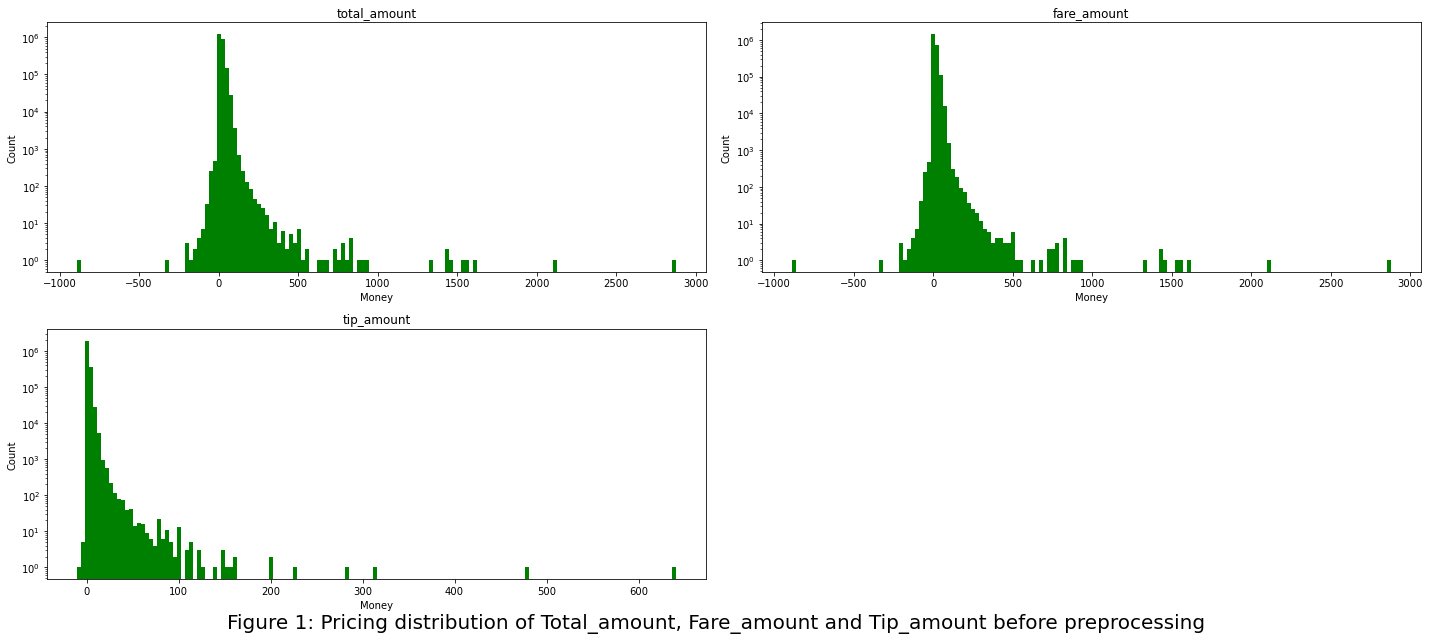

In [ ]:
#plot histograms for the prices
fig=plt.figure(figsize=(20,30))
c=1
for x in ['total_amount', 'fare_amount', 'tip_amount']:
    ax= plt.subplot(7,2,c)
    ax.set_yscale('log')
    _ =plt.hist(Green[x], bins=150,color='g')
    _ =plt.title(x)
    plt.xlabel('Money')
    plt.ylabel('Count')
    c+=1

plt.suptitle("Figure 1: Pricing distribution of Total_amount, Fare_amount and Tip_amount before preprocessing",x=0.5, y=0.7,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In Figure 1, we represented the distribution for the different types of prices, where total_amount = tip_amount + fare_amount +some extras. We plotted then in a logarithmic scale for the y axis to get a better understanding of the data.

We observed that there are some negative values for 'Tip_amount', 'Fare amount' and 'Total_amount' that don't make sense and need to be removed. These negative values may be caused by an error in the data registration.

In [ ]:
#Converting the distances in Km and deleting the rows with negative values of the prices and passanger_count
Green['trip_distance']= Green['trip_distance']*1.60934 #distance in km
Green = Green[Green['total_amount']>0]
Green = Green[Green['fare_amount']>0]
Green = Green[Green['tip_amount']>0]
Green = Green[Green['passenger_count']>0]

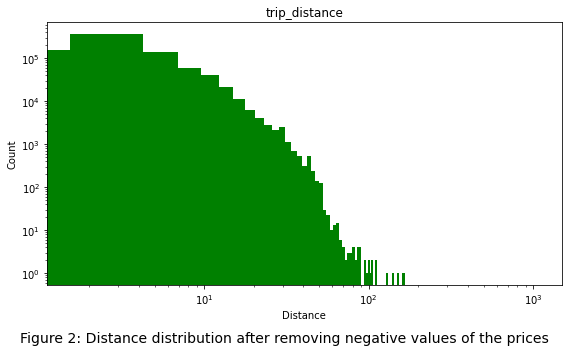

In [ ]:
#Plot the distribution of the distance
fig=plt.figure(figsize=(8,5))
plt.yscale('log')
plt.xscale('log')
_=plt.hist(Green['trip_distance'], bins=400, color='g')
_=plt.title('trip_distance')
plt.xlabel('Distance')
plt.ylabel('Count')

plt.suptitle("Figure 2: Distance distribution after removing negative values of the prices",x=0.5, y=0,ha='center', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
Outliers= len(Green[(Green['trip_distance']>100)]) + len(Green[(Green['trip_distance']<0)])
print('Number of outliers:', Outliers)

Number of outliers: 25


Figure 2 is a representation of the distance distribution in logarithmic scale. The almost linear decrease in the shape of the distribution tell us that the distances are distributed as an exponential distribution, where almost all of the values are between the range [0,100]. Only some outliers (25) have a really high value for the trip_distance that taxis don't normally do. In conclusion, we remove these few outliers from our final dataset.

In [ ]:
Green = Green[(Green['trip_distance']<100) & (Green['trip_distance']>0)]

Now, we are able to concatenate this dataset with the following ones, we save the preprocessing data and we prepare it for the concatenation.

In [ ]:
#Changing the names of the columns to be able to concatenate the dataset with the others
Green.columns = ['PULocationID', 'DOLocationID', 'Passenger_count', 'Trip_distance',
       'Fare_amount', 'Tip_amount', 'Total_amount', 'Payment_type',
       'pickup_date', 'dropoff_date', 'Month', 'Year', 'pickup_hour',
       'dropoff_hour', 'type', 'Day']

In [ ]:
Green.to_pickle("Green.pkl", protocol=4)

### Cleaning of the FHV dataset

The second dataset we found contain some information about FHV. These vehicles work as a taxis, but they are operated by private companies.

In [ ]:
FHV20 = pd.read_csv('20_FHV.csv')
FHV19 = pd.read_csv('19_FHV.csv')

In [ ]:
#Changing the name of some columns to be able to concatenate both years
FHV19['Dispatching_base_num']= FHV19['dispatching_base_num']
FHV19['Pickup_datetime']= FHV19['pickup_datetime']
FHV19['DropOff_datetime']= FHV19['dropoff_datetime']
FHV19.drop(['dropoff_datetime','pickup_datetime', 'dispatching_base_num'], axis='columns', inplace=True)

In [ ]:
#Concatenation of 2019 and 2020 datasets
FHV = pd.concat([FHV19, FHV20])
FHV.head()

,PULocationID,DOLocationID,SR_Flag,Dispatching_base_num,Pickup_datetime,DropOff_datetime
0,NaN,265.0,NaN,B01239,01/01/2019 12:52:56 AM,01/01/2019 12:57:03 AM
1,NaN,265.0,NaN,B01239,01/01/2019 12:29:45 AM,01/01/2019 12:41:49 AM
2,NaN,265.0,NaN,B01239,01/01/2019 12:13:20 AM,01/01/2019 12:34:35 AM
3,NaN,265.0,NaN,B01239,01/01/2019 12:00:38 AM,01/01/2019 12:10:09 AM
4,NaN,265.0,NaN,B01239,01/01/2019 12:23:57 AM,01/01/2019 12:40:00 AM


In [ ]:
#Transformation of the dates in datetime
FHV['pickup_date']= pd.to_datetime(FHV['Pickup_datetime'].astype(str).str[0:10], errors='coerce')
FHV['dropoff_date']= pd.to_datetime(FHV['DropOff_datetime'].astype(str).str[0:10], errors='coerce')
FHV['pickup_Time']= pd.to_datetime(FHV['Pickup_datetime'].astype(str).str[11:], format='%I:%M:%S %p',errors='coerce')
FHV['dropoff_Time']= pd.to_datetime(FHV['Pickup_datetime'].astype(str).str[11:], format='%I:%M:%S %p',errors='coerce')

In [ ]:
#Changing AM/PM time format to 24h format
FHV['pickup_Time'] =FHV['pickup_Time'].dt.strftime('%H:%M:%S')
FHV['dropoff_Time'] =FHV['dropoff_Time'].dt.strftime('%H:%M:%S')

In [ ]:
#Saving the information of the year and month in different columns
FHV['Month'] = FHV['pickup_date'].dt.month
FHV['Year'] = FHV['pickup_date'].dt.year

In [ ]:
#Drop columns without importance for our analysis
FHV= FHV.drop(columns=['Pickup_datetime','DropOff_datetime', 'SR_Flag','Dispatching_base_num'])
FHV["type"] = "FHV"
FHV.head()

,PULocationID,DOLocationID,pickup_date,dropoff_date,pickup_Time,dropoff_Time,Month,Year,type
0,NaN,265.0,2019-01-01,2019-01-01,00:52:56,00:52:56,1,2019,FHV
1,NaN,265.0,2019-01-01,2019-01-01,00:29:45,00:29:45,1,2019,FHV
2,NaN,265.0,2019-01-01,2019-01-01,00:13:20,00:13:20,1,2019,FHV
3,NaN,265.0,2019-01-01,2019-01-01,00:00:38,00:00:38,1,2019,FHV
4,NaN,265.0,2019-01-01,2019-01-01,00:23:57,00:23:57,1,2019,FHV


We observed that it seems to be a lot of numbers without the 'PULocationID' information, for that reason, we calculate the percentage of Nan in that column:

In [ ]:
print("Percentage of Nan in the Pick up LocationID", FHV['PULocationID'].isna().sum()/len(FHV))

Percentage of Nan in the Pick up LocationID 0.18351919510784262


Actually, the percentage of Nan for the Pick up LocationID is quite high compare with the other datasets.

Moreover, this dataset doesn't contain any information about prices or distances.

We plot the monthly distribution of FHV to see if we can extract some relevant temporal information that could be useful for further analysis:

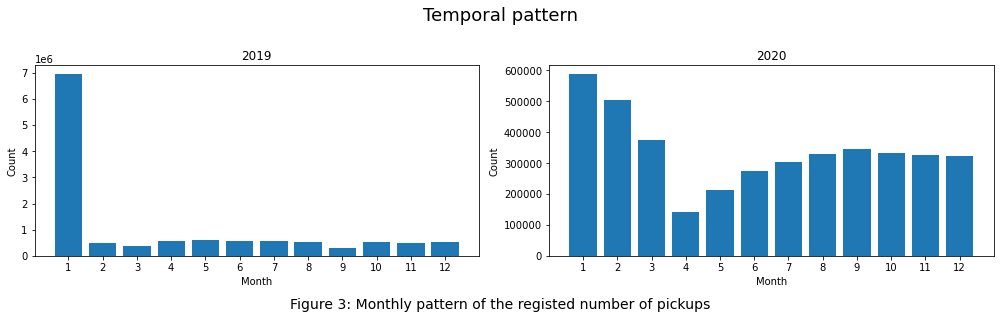

In [ ]:
#plot the monthly distribution of FHV
c=0
z= np.arange(1,13)
f, axs = plt.subplots(1, 2, tight_layout=True, figsize=(14,4))
f.suptitle("Temporal pattern", fontsize=18, y=1.01)
f.text(0.5,0, "Figure 3: Monthly pattern of the registed number of pickups", ha='center', va="top", size=14)
for x in [2019, 2020]:
    taxi = FHV[FHV.Year==x].groupby('Month').size()
    axs[c].bar(z, taxi)
    axs[c].set_title(x)
    axs[c].set_xlabel('Month')
    axs[c].set_ylabel('Count')
    axs[c].set_xticks(range(1, 13,1))
    c+=1

In figure 3, we can observe that the 2019 distribution for FHV does not follow a reasonable pattern, since the great majority of the rides are recorded in January. At this point, only information from 2020 could be useful.

Given all the previous reasons, we decided to drop this dataset from the analysis and focus on the differences between Green and Yellow taxis.

### Cleaning of the Yellow19 dataset

Given the large size of this dataset, we had to obtain it in three different parts.

In [ ]:
#Given the big weight of the Yellow_19 dataset, we divided in three parts
Yellow19_1 = pd.read_csv('19_Yellow_1.csv')
Yellow19_2 = pd.read_csv('19_Yellow_2.csv')
Yellow19_3 = pd.read_csv('19_Yellow_3.csv')

This code is modified for the three dataset, each one at a time:

In [ ]:
#Drop columns without importance for our analysis
Yellow19_1= Yellow19_1.drop(columns=['store_and_fwd_flag', 'VendorID','RatecodeID','congestion_surcharge','improvement_surcharge', 'mta_tax', 'tolls_amount','extra'])

In [ ]:
#Transformation of the dates in datetime and extracting month and year columns
Yellow19_1['pickup_date']= pd.to_datetime(Yellow19_1['lpep_pickup_datetime'].astype(str).str[0:10], errors='coerce')
Yellow19_1['dropoff_date']= pd.to_datetime(Yellow19_1['lpep_dropoff_datetime'].astype(str).str[0:10], errors='coerce')
Yellow19_1['Month'] = Yellow19_1['pickup_date'].dt.month
Yellow19_1['Year'] = Yellow19_1['pickup_date'].dt.year

In [ ]:
#Changing AM/PM time format to 24h format
Yellow19_1['pickup_Time']= pd.to_datetime(Yellow19_1['lpep_pickup_datetime'].astype(str).str[11:], format='%I:%M:%S %p',errors='coerce')
Yellow19_1['dropoff_Time']= pd.to_datetime(Yellow19_1['lpep_dropoff_datetime'].astype(str).str[11:], format='%I:%M:%S %p',errors='coerce')
Yellow19_1['pickup_Time'] = pd.to_datetime(Yellow19_1['pickup_Time'].dt.strftime('%H:%M:%S'), errors='coerce')
Yellow19_1['dropoff_Time'] = pd.to_datetime(Yellow19_1['dropoff_Time'].dt.strftime('%H:%M:%S'), errors='coerce')

In [ ]:
#Extracting the hour and day column
Yellow19_1['pickup_hour'] = Yellow19_1['pickup_Time'].dt.hour
Yellow19_1['dropoff_hour']= Yellow19_1['dropoff_Time'].dt.hour
Yellow19_1["type"] = "yellow"
Yellow19_1['Day'] = Yellow19_1['pickup_date'].dt.day
Yellow19_1['Day_of_week'] =Yellow19_1['pickup_date'].dt.strftime('%A')
Yellow19_1= Yellow19_1.drop(columns=['lpep_pickup_datetime','lpep_dropoff_datetime', 'pickup_Time','dropoff_Time'])

Once we have preprocessing the datetimes columns for the three dataset, we concatenate them:

In [ ]:
Yellow19 = pd.concat([Yellow19_1, Yellow19_2, Yellow19_3])
Yellow19.head()

,Passenger_count,Trip_distance,PULocationID,DOLocationID,Payment_type,Fare_amount,Tip_amount,Total_amount,pickup_date,dropoff_date,Month,Year,pickup_hour,dropoff_hour,type,Day,Day_of_week
1,2.0,4.715366,79,229,1.0,9.5,2.66,15.96,2019-07-06,2019-07-06,7,2019,2,2,yellow,6,Saturday
2,1.0,2.011675,239,236,1.0,7.0,2.16,12.96,2019-07-06,2019-07-06,7,2019,2,2,yellow,6,Saturday
3,1.0,0.965604,4,79,1.0,5.0,1.75,10.55,2019-07-06,2019-07-06,7,2019,2,2,yellow,6,Saturday
4,2.0,1.223098,79,144,1.0,6.0,1.96,11.76,2019-07-06,2019-07-06,7,2019,2,2,yellow,6,Saturday
5,2.0,6.437360,161,179,1.0,14.0,3.55,21.35,2019-07-06,2019-07-06,7,2019,2,2,yellow,6,Saturday


It is time now to start plotting some columns distribution to be able to proceed with the cleaning:

In [ ]:
Yellow19 = pd.concat([Yellow19_1, Yellow19_2, Yellow19_3])

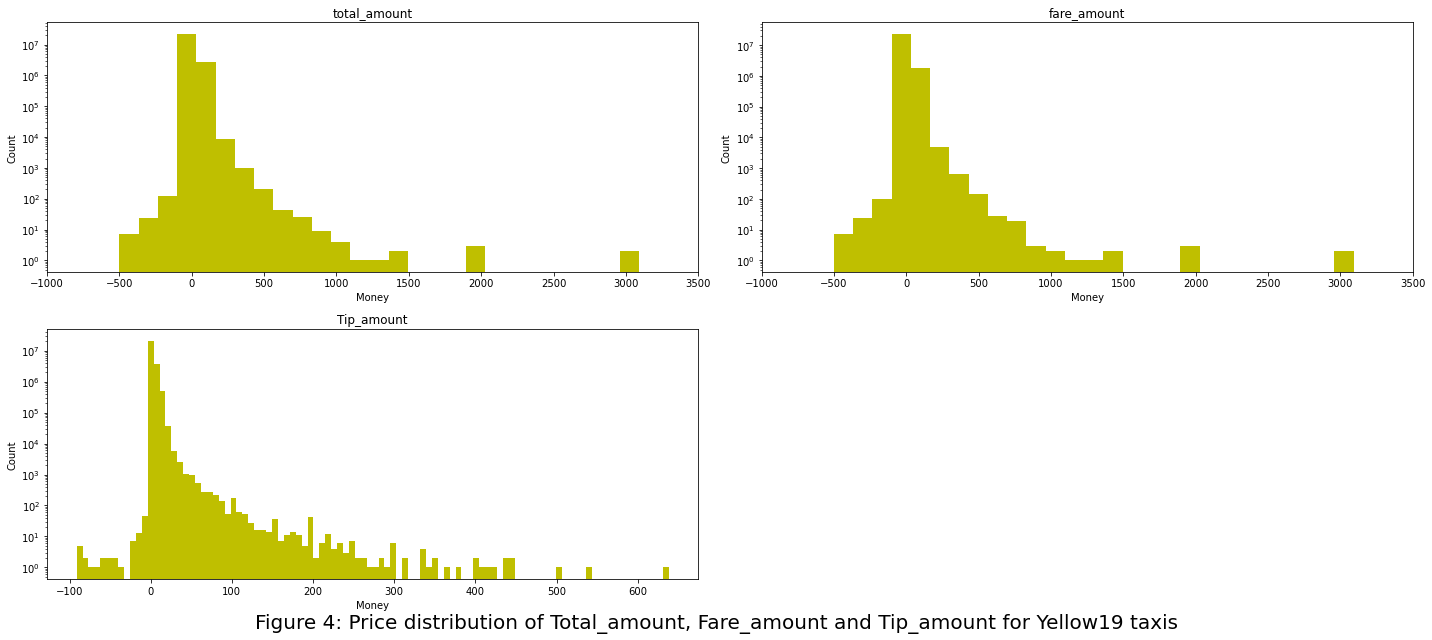

In [ ]:
#histogram of the prices before preprocessing
fig=plt.figure(figsize=(20,30))
c=1
for x in ['total_amount', 'fare_amount']:
    ax= plt.subplot(7,2,c)
    ax.set_yscale('log')
    plt.xlim(-1000, 3500)
    _ =plt.hist(Yellow19[x], bins=3000, color='y')
    _ =plt.title(x)
    plt.xlabel('Money')
    plt.ylabel('Count')
    c+=1
    
ax= plt.subplot(7,2,c)
ax.set_yscale('log')
_ =plt.hist(Yellow19['tip_amount'], bins=100, color='y')
_ =plt.title('Tip_amount')
plt.xlabel('Money')
plt.ylabel('Count')

plt.suptitle("Figure 4: Price distribution of Total_amount, Fare_amount and Tip_amount for Yellow19 taxis",x=0.5, y=0.7,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

Based in figure 4, where we plot the distribution for the different types of prices in a logarithmic scale for the y axis, we observe that again, there are some negative values for 'tip_amount','Fare amount' and 'Total_amount' that need to be removed.
We believe that these negative values may be caused by an error in the registration of the data.

We also realize that there are some  really high prices both for 'Fare amount' and 'Total_amount', we will see if after plotting and preprocessing the 'trip_distance' column we can handle this problem.

In [ ]:
#Converting the distances in Km and deleting the rows with negative values of the prices and passanger_count
Yellow19['trip_distance']= Yellow19['trip_distance']*1.60934 #distance in km!!!
Yellow19 = Yellow19[Yellow19['total_amount']>0]
Yellow19 = Yellow19[Yellow19['fare_amount']>0]
Yellow19 = Yellow19[Yellow19['passenger_count']>0]
Yellow19 = Yellow19[Yellow19['tip_amount']>0]

We plot the 'trip_distance' distribution in log scale here:

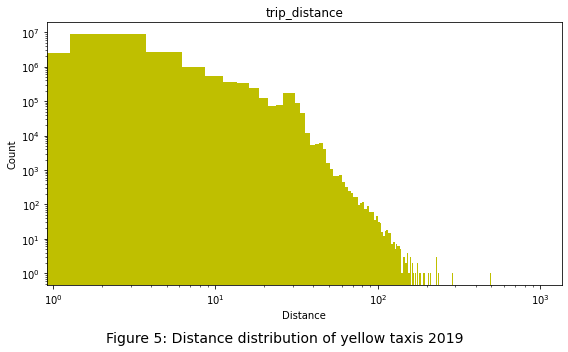

In [ ]:
#Plot the distribution of the distance
fig=plt.figure(figsize=(8,5))
plt.yscale('log')
plt.xscale('log')
#plt.xlim(-50, 250)
#plt.xticks(range(0, 1200, 100))
_=plt.hist(Yellow19['trip_distance'], bins=400, color='y')
_=plt.title('trip_distance')
plt.xlabel('Distance')
plt.ylabel('Count')

plt.suptitle("Figure 5: Distance distribution of yellow taxis 2019",x=0.5, y=0,ha='center', fontsize=14)
plt.tight_layout()
plt.show()

Figure 5 represents the distance distribution in logarithmic scale after deleting the negative values of the prices. The almost linear decrease in the shape of the distribution point out that the distances are distributed as an exponential distribution, where almost all of the values are between the range [0,100]. We also find some outliers at really high distances. We will remove these few outliers from our final dataset.

In [ ]:
Yellow19 = Yellow19[(Yellow19['trip_distance']<100) & (Yellow19['trip_distance']>0)]

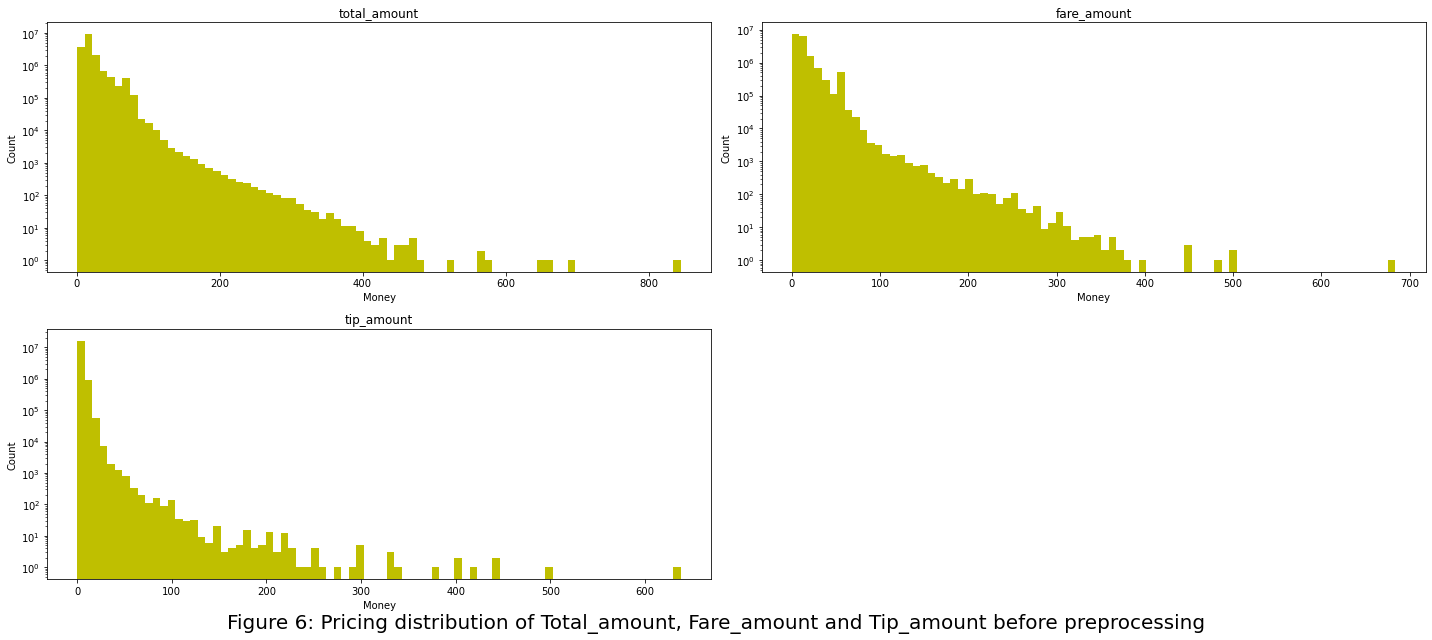

In [ ]:
#histogram of the prices after preprocessing
fig=plt.figure(figsize=(20,30))
c=1
for x in ['total_amount', 'fare_amount', 'tip_amount']:
    ax= plt.subplot(7,2,c)
    ax.set_yscale('log')
    _ =plt.hist(Yellow19[x], bins=80,color='y')
    _ =plt.title(x)
    plt.xlabel('Money')
    plt.ylabel('Count')
    c+=1

plt.suptitle("Figure 6: Pricing distribution of Total_amount, Fare_amount and Tip_amount before preprocessing",x=0.5, y=0.7,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
len(Yellow19[Yellow19['fare_amount']>400])

7

In figure 6, we can see how the prices have a more reasonable distribution with only 7 values where the 'fare_mount' is greater than 400. Almost all the prices are in between [0, 300] and we find more values for smaller quantities around 0.

In [ ]:
#Check the number of Nan in the Pick up locationID
print("Number of Nan in the Pick up LocationID", Yellow19['PULocationID'].isna().sum())

Number of Nan in the Pick up LocationID 0


In [ ]:
#Changing the names of the columns to be able to concatenate with the other datasets
Yellow19.columns = ['Passenger_count', 'Trip_distance', 'PULocationID', 'DOLocationID',
       'Payment_type', 'Fare_amount', 'Tip_amount', 'Total_amount',
       'pickup_date', 'dropoff_date', 'Month', 'Year', 'pickup_hour',
       'dropoff_hour', 'type', 'Day']

The dataset is ready for the concatenation with the other ones.

In [ ]:
Yellow19.to_pickle("Yellow19.pkl", protocol=4)

### Cleaning of the Yellow20 dataset

Finally, the last dataset we are going to analyze is the data regarding yellow taxis in 2020.

In [ ]:
Yellow20 = pd.read_csv('20_Yellow.csv')

C:\Users\loren\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
#Drop the columns that are not relevant for the analysis
Yellow20= Yellow20.drop(columns=['Store_and_fwd_flag', 'VendorID','RateCodeID','congestion_surcharge','Improvement_surcharge', 'MTA_tax', 'Tolls_amount', 'Extra'])
Yellow20.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,Passenger_count,Trip_distance,PULocationID,DOLocationID,Payment_type,Fare_amount,Tip_amount,Total_amount
0,12/18/2019 03:27:49 PM,12/18/2019 03:28:59 PM,1.0,0.0,193,193,1.0,0.01,0.00,2.81
1,01/01/2020 12:29:01 AM,01/01/2020 12:40:28 AM,2.0,0.7,246,48,1.0,8.00,2.35,14.15
2,01/01/2020 12:56:38 AM,01/01/2020 01:13:34 AM,1.0,1.7,246,142,2.0,11.50,0.00,15.30
3,01/01/2020 12:25:39 AM,01/01/2020 12:27:05 AM,1.0,0.0,170,162,4.0,3.00,0.00,6.80
4,01/01/2020 12:49:00 AM,01/01/2020 01:17:42 AM,1.0,2.9,161,262,1.0,19.00,4.55,27.35


We begin with the preprocesing of the temporal information to make it more tractable.

In [ ]:
#Transformation of the dates in datetime and extracting the information about the year, month and day
Yellow20['pickup_date']= pd.to_datetime(Yellow20['tpep_pickup_datetime'].astype(str).str[0:10], errors='coerce')
Yellow20['dropoff_date']= pd.to_datetime(Yellow20['tpep_dropoff_datetime'].astype(str).str[0:10], errors='coerce')
Yellow20['Month'] = Yellow20['pickup_date'].dt.month
Yellow20['Year'] = Yellow20['pickup_date'].dt.year
Yellow20['Day'] = Yellow20['pickup_date'].dt.day
Yellow20['Day_of_week'] = Yellow20['pickup_date'].dt.strftime('%A')

In [ ]:
#Changing AM/PM time format to 24h format and extracting the information about the hour
Yellow20['pickup_Time']= pd.to_datetime(Yellow20['tpep_pickup_datetime'].astype(str).str[11:], format='%I:%M:%S %p',errors='coerce')
Yellow20['dropoff_Time']= pd.to_datetime(Yellow20['tpep_dropoff_datetime'].astype(str).str[11:], format='%I:%M:%S %p',errors='coerce')
Yellow20['pickup_Time'] = pd.to_datetime(Yellow20['pickup_Time'].dt.strftime('%H:%M:%S'), errors='coerce')
Yellow20['dropoff_Time'] = pd.to_datetime(Yellow20['dropoff_Time'].dt.strftime('%H:%M:%S'), errors='coerce')
Yellow20['pickup_hour'] = Yellow20['pickup_Time'].dt.hour
Yellow20['dropoff_hour']= Yellow20['dropoff_Time'].dt.hour
Yellow20= Yellow20.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','pickup_Time','dropoff_Time'])

In [ ]:
#add the column for the type of taxi
Yellow20["type"] = "yellow"
Yellow20.head()

,Passenger_count,Trip_distance,PULocationID,DOLocationID,Payment_type,Fare_amount,Tip_amount,Total_amount,pickup_date,dropoff_date,Month,Year,Day,Day_of_week,pickup_hour,dropoff_hour,type
0,1.0,0.0,193,193,1.0,0.01,0.00,2.81,2019-12-18,2019-12-18,12,2019,18,Wednesday,15,15,yellow
1,2.0,0.7,246,48,1.0,8.00,2.35,14.15,2020-01-01,2020-01-01,1,2020,1,Wednesday,0,0,yellow
2,1.0,1.7,246,142,2.0,11.50,0.00,15.30,2020-01-01,2020-01-01,1,2020,1,Wednesday,0,1,yellow
3,1.0,0.0,170,162,4.0,3.00,0.00,6.80,2020-01-01,2020-01-01,1,2020,1,Wednesday,0,0,yellow
4,1.0,2.9,161,262,1.0,19.00,4.55,27.35,2020-01-01,2020-01-01,1,2020,1,Wednesday,0,1,yellow


In [ ]:
#Check the number of Nan in the Pick up LocationID
print("Number of Nan in the Pick up LocationID",Yellow20['PULocationID'].isna().sum())

Number of Nan in the Pick up LocationID 0


In order to proceed with the cleaning, we plot the distributions of the prices:

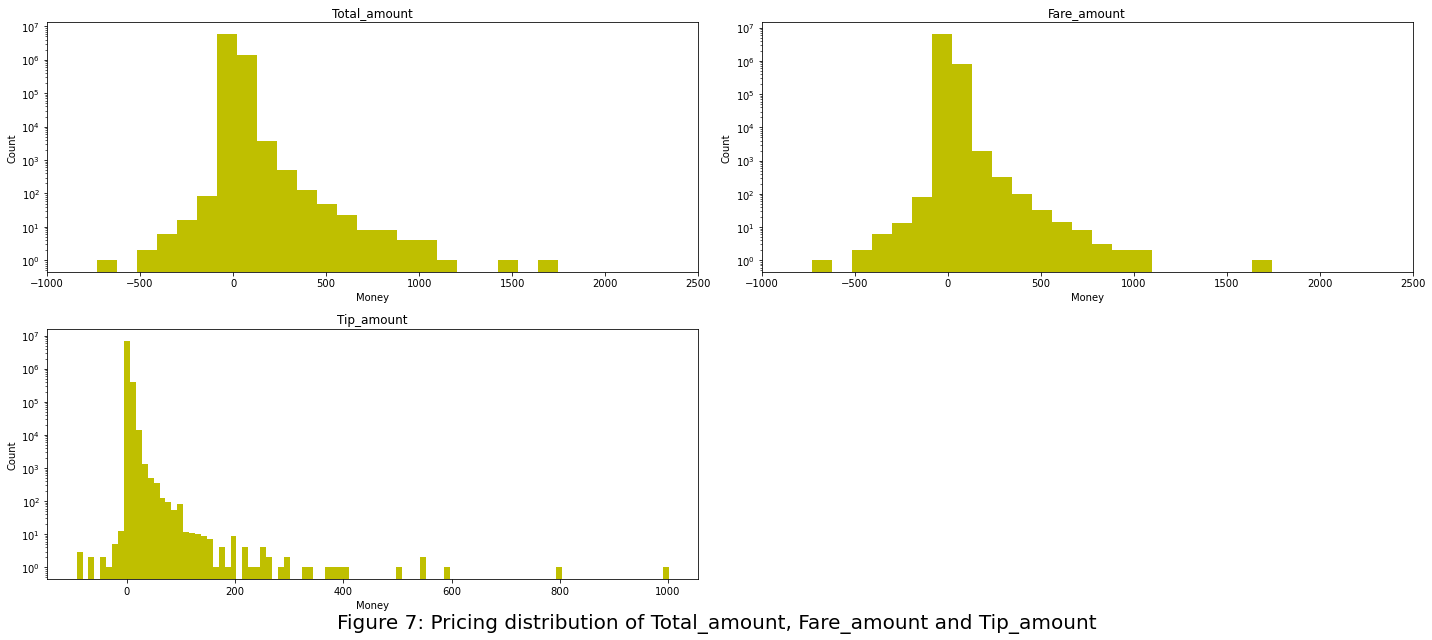

In [ ]:
#histogram of the prices before preprocessing
fig=plt.figure(figsize=(20,30))
c=1
for x in ['Total_amount', 'Fare_amount']:
    ax= plt.subplot(7,2,c)
    ax.set_yscale('log')
    plt.xlim(-1000, 2500)
    _ =plt.hist(Yellow20[x], bins=4000, color='y')
    _ =plt.title(x)
    plt.xlabel('Money')
    plt.ylabel('Count')
    c+=1
    
ax= plt.subplot(7,2,c)
ax.set_yscale('log')
_ =plt.hist(Yellow20['Tip_amount'], bins=100, color='y')
_ =plt.title('Tip_amount')
plt.xlabel('Money')
plt.ylabel('Count')

plt.suptitle("Figure 7: Pricing distribution of Total_amount, Fare_amount and Tip_amount",x=0.5, y=0.7,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

As we can see in figure 7, in all the distributions of 'Tip_amount','Fare amount' and 'Total_amount' there are  again some negative values, that we will delete from the dataset. We also realize that there are some high prices both for 'Fare amount' and 'Total_amount', that we will need to analyze later after the preprocessing of the distance.

In [ ]:
#Converting the distances in Km and deleting the rows with negative values of the prices
Yellow20['Trip_distance']= Yellow20['Trip_distance']*1.60934 #distance in km!!!
Yellow20 = Yellow20[Yellow20['Total_amount']>0]
Yellow20 = Yellow20[Yellow20['Fare_amount']>0]
Yellow20 = Yellow20[Yellow20['Passenger_count']>0]
Yellow20 = Yellow20[Yellow20['Tip_amount']>0]

Now, let's take a look to the 'Trip_distance' distribution:

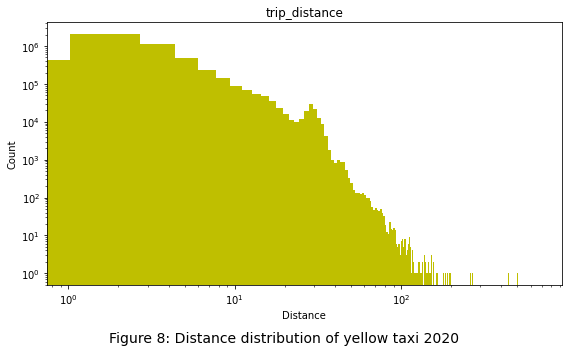

In [ ]:
#Plot the distribution of the distance
fig=plt.figure(figsize=(8,5))
plt.yscale('log')
plt.xscale('log')
_=plt.hist(Yellow20['Trip_distance'], bins=400, color='y')
_=plt.title('trip_distance')
plt.xlabel('Distance')
plt.ylabel('Count')

plt.suptitle("Figure 8: Distance distribution of yellow taxi 2020",x=0.5, y=0,ha='center', fontsize=14)
plt.tight_layout()
plt.show()

Figure 8 shows the distance distribution in logarithmic scale after deleting the negative values of the prices. The almost linear decrease in the shape of the distribution tell us that the distances are distribute as an exponential distribution, where almost all of the values are between the range [0,100] and we also find some outliers for really high distances that taxis don't use to do. The next step is then removing these few outliers from our dataset.

In [ ]:
Yellow20 = Yellow20[(Yellow20['Trip_distance']<100) & (Yellow20['Trip_distance']>0)]

Let's see how is the distribution of the prices now:

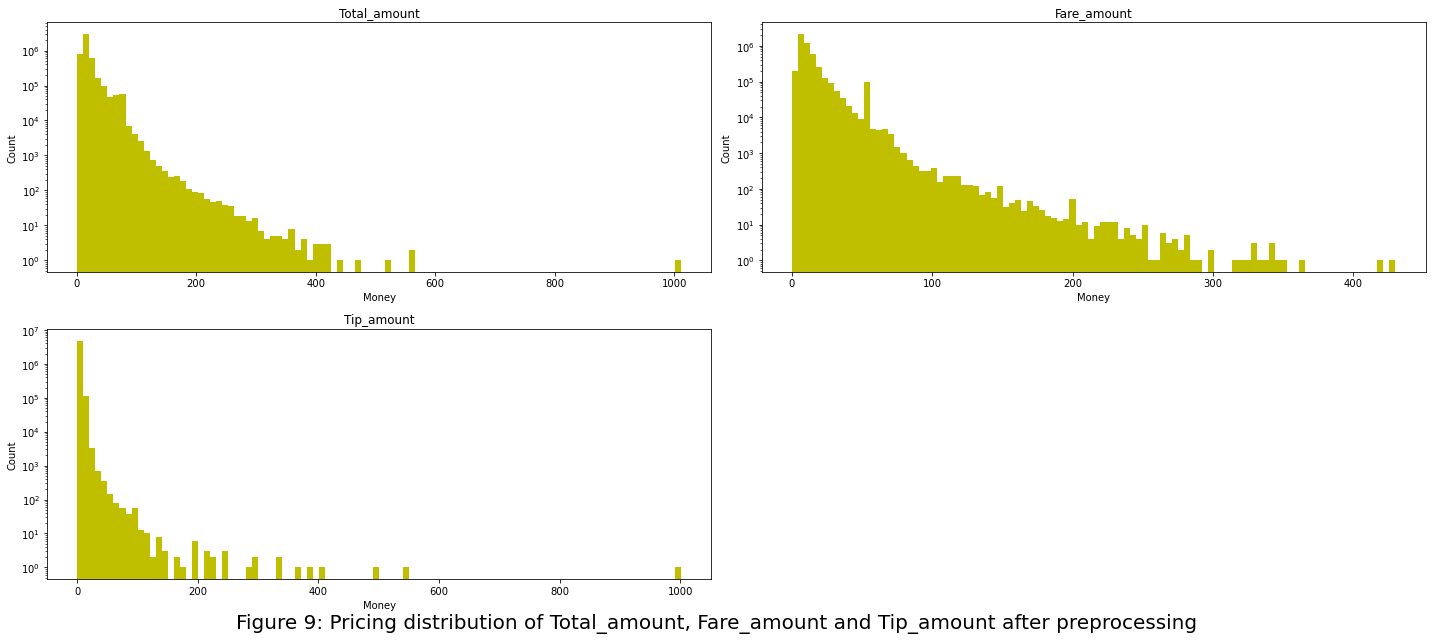

In [ ]:
#histogram of the prices after preprocessing
fig=plt.figure(figsize=(20,30))
c=1
for x in ['Total_amount', 'Fare_amount', 'Tip_amount']:
    ax= plt.subplot(7,2,c)
    ax.set_yscale('log')
    #plt.xlim(-1000, 2500)
    _ =plt.hist(Yellow20[x], bins=100, color='y')
    _ =plt.title(x)
    plt.xlabel('Money')
    plt.ylabel('Count')
    c+=1

plt.suptitle("Figure 9: Pricing distribution of Total_amount, Fare_amount and Tip_amount after preprocessing",x=0.5, y=0.7,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
print('Number of records with total amount higher than 500:',len(Yellow20[Yellow20['Total_amount']>500]))

Number of records with total amount higher than 500: 4


As we observe in figure 9, the distribution of the prices doesn't have so many high values as before and looks much more realistic. It has only 4 values where the 'Total_amount' is higher than 400. Therefore, the data is prepare for further analysis.

In [ ]:
Yellow20.to_pickle("Yellow20.pkl",protocol=4)

# Part 3: Data Analysis

In this second part, we are going to focus in analyze and describe the dataset we have already preprocessed.

In [ ]:
#Read the preprocessing data
data = pd.read_pickle("Complete_data.pkl")

In [ ]:
data.head()

,PULocationID,DOLocationID,Passenger_count,Trip_distance,Fare_amount,Tip_amount,Total_amount,Payment_type,pickup_date,dropoff_date,Month,Year,pickup_hour,dropoff_hour,type,Day,Day_of_week
0,66,36,1.0,7.177656,17.5,3.76,22.56,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1,Friday
1,255,112,1.0,2.027768,6.0,1.46,8.76,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1,Friday
2,82,83,1.0,1.625433,5.5,2.04,8.84,1.0,2019-02-01,2019-02-01,2,2019,0,1,green,1,Friday
3,255,112,1.0,1.834648,5.5,1.70,8.50,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1,Friday
4,7,7,1.0,1.689807,5.5,2.00,8.80,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1,Friday


### Correlation analysis

Before starting with the temporal analysis we want to point out some correlations between variables that should be taking into account while plotting.

The column of 'Total_amount' is the sum of 'Tip_amount' and 'Fare_amount' columns plus some extras dollars that we are not taking into account in this analysis.

On the other hand, the variable 'Fare amount' is proportional to 'Trip_distance', in a way that if we increase the number of kilometers, the fare amount will also increasy proportionally. Let's plot this correlation so we can represent the slope of the line, i.e, the coefficient of proporcionality.

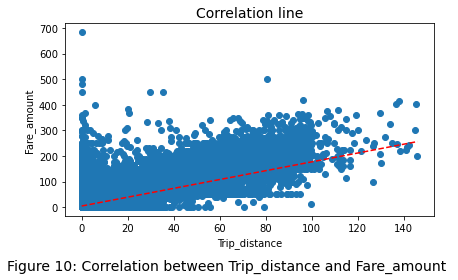

In [ ]:
#plot the correlation between Trip_distance and Fare_amount
_=plt.scatter(data['Trip_distance'], data['Fare_amount'])
x=np.mean(data['Trip_distance'])
y=np.mean(data['Fare_amount'])
N=len(data['Fare_amount'])
a=(np.dot(data['Trip_distance'],data['Fare_amount'])-N*x*y)/(np.dot(data['Trip_distance'],data['Trip_distance'])-N*x**2)
b=-a*x+y
x1=np.linspace(0,max(data['Trip_distance']))
_=plt.plot(x1,a*x1+b,'r--')
plt.xlabel('Trip_distance', fontsize=10)
plt.ylabel('Fare_amount', fontsize=10)
plt.title('Correlation line', fontsize=14)
plt.suptitle("Figure 10: Correlation between Trip_distance and Fare_amount ",x=0.5, y=0,ha='center', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
print('The proportionality coefficient given by the slope of the line is:', a)

The proportionality coefficient given by the slope of the line is: 1.7256216301660396


Actually, they look quite correlated but there are also some outliers. The best way of quantify how much correlated two variables are is by computing the Pearsons correlation, where 0 means they are not correlated at all, and 1 that they follow a perfect fitting line.

In [ ]:
# calculate Pearson's correlation
corr, _ = pearsonr(data['Trip_distance'], data['Fare_amount'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.937


The Pearson correlation is quite high! So, it means that then plotting one of this two variables, the other one will also follow a similar behavor.

On the other hand, as we were commenting at the beginning, also the Total_amount should be correlated with the Trip_distance. Even though, we expect this correlation to be smaller.

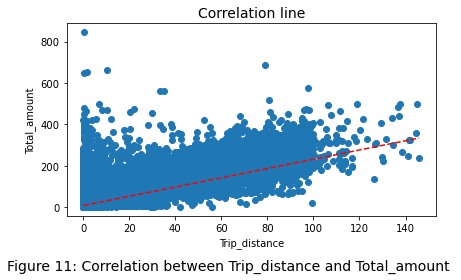

In [ ]:
#plot the correlation between Trip_distance and Fare_amount
_=plt.scatter(data['Trip_distance'], data['Total_amount'])
x=np.mean(data['Trip_distance'])
y=np.mean(data['Total_amount'])
N=len(data['Total_amount'])
a=(np.dot(data['Trip_distance'],data['Total_amount'])-N*x*y)/(np.dot(data['Trip_distance'],data['Trip_distance'])-N*x**2)
b=-a*x+y
x1=np.linspace(0,max(data['Trip_distance']))
_=plt.plot(x1,a*x1+b,'r--')
plt.xlabel('Trip_distance', fontsize=10)
plt.ylabel('Total_amount', fontsize=10)
plt.title('Correlation line', fontsize=14)
plt.suptitle("Figure 11: Correlation between Trip_distance and Total_amount ",x=0.5, y=0,ha='center', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# calculate Pearson's correlation
corr2, _ = pearsonr(data['Trip_distance'], data['Total_amount'])
print('Pearsons correlation: %.3f' % corr2)

Pearsons correlation: 0.931


The correlation is still quite high even though the total_amount doesn't depend only on the Trip_distance. Again, this means that when plotting them, the behavior will be similar for the three of them.

## Part 3.a: temporal analysis

We will start with some temporal analysis in order to discover some interesting patterns in the evolution of the data.
Because of Covid-19, we expect that the 2020 data provide us with some characteristic insights that would be worth investigating.

### Monthy distributions

We will start by plotting some monthy distributions to have a general understanding of the data:

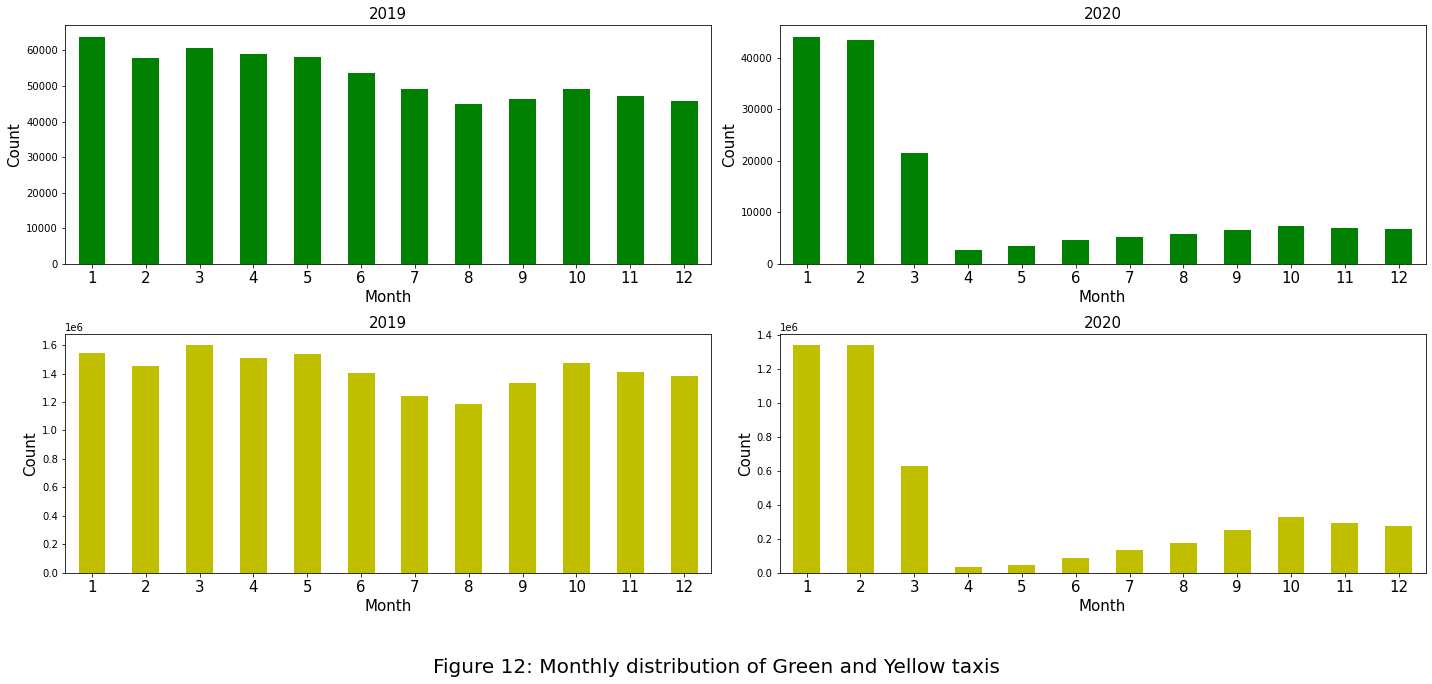

In [ ]:
#Plot monthy distributions of the pick-ups for both types of taxis
c=1
fig=plt.figure(figsize=(20,30))
for x in [2019, 2020]:
    ax= plt.subplot(7,2,c)
    taxi = data[(data.Year==x) & (data.type=='green')].groupby('Month').size()
    taxi.plot(kind='bar',color = 'g')
    plt.title(x, fontsize=15)
    plt.xlabel('Month', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(range(0, 12,1), fontsize=15, rotation='horizontal')
    c+=1
for x in [2019, 2020]:
    ax= plt.subplot(7,2,c)
    taxi = data[(data.Year==x) & (data.type=='yellow')].groupby('Month').size()
    taxi.plot(kind='bar',color = 'y')
    plt.title(x, fontsize=15)
    plt.xlabel('Month', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(range(0, 12,1), fontsize=15, rotation='horizontal')
    c+=1

plt.suptitle("Figure 12: Monthly distribution of Green and Yellow taxis",x=0.5, y=0.68,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

The shape of the distribution it is quite similar for both types of taxis. We can clearly see the effect that the Coronavirus had in the taxi demand, starting in March 2020, when the quarantine restrictions began in NYC.

On the other side, it seems that the quantity of yellow taxis rides is much higher than for the green ones. Let's try to see this better by plotting them in the same histogram!

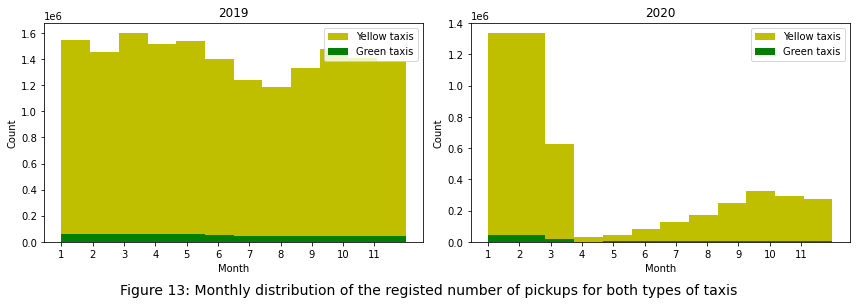

In [ ]:
#Plot monthy distributions of the pick-ups for both types of taxis in the same figure
c=0
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,4))
fig.text(0.5,0, "Figure 13: Monthly distribution of the registed number of pickups for both types of taxis", ha='center', va="top", size=14)
for x in [2019, 2020]:
    hist1= data[(data.Year==x) & (data.type=='yellow')]
    hist3= data[(data.Year==x) & (data.type=='green')]
    axs[c].hist(hist1["Month"], bins=12, alpha=1,color='y', label="Yellow taxis")
    axs[c].hist(hist3["Month"], bins=12, alpha=1, color='g', label="Green taxis")
    axs[c].set_title(x)
    axs[c].set_xticks(range(1, 12,1))
    axs[c].set_xlabel('Month')
    axs[c].set_ylabel('Count')
    axs[c].legend(loc="upper right")
    c+=1

In figure 13, we can see that the demand is clearly dominated by yellow cabs, both for 2019 and 2020. Green taxi rides are only a small portion of the total.

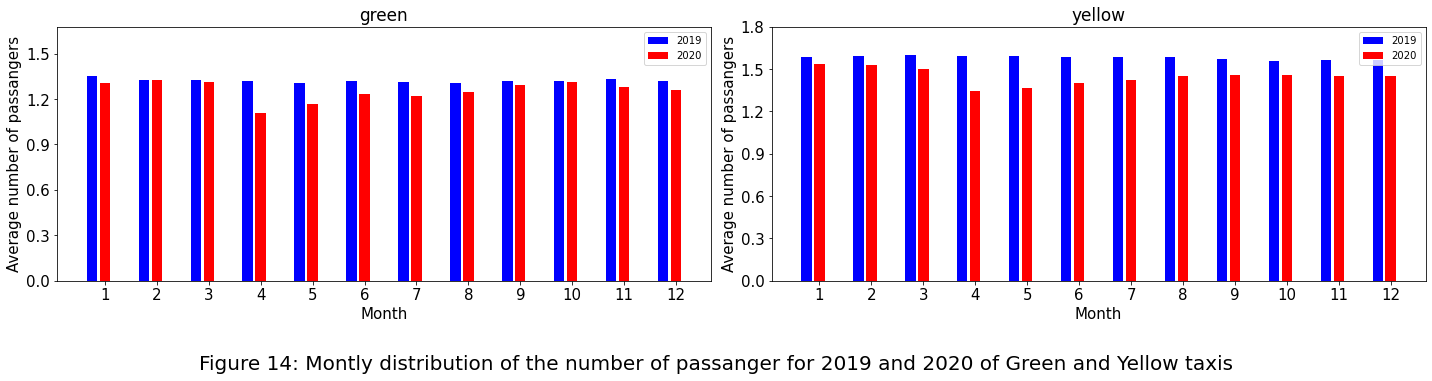

In [ ]:
#Plot monthy distributions of the Passager_count
c=1
fig=plt.figure(figsize=(20,30))
z= np.arange(1,13)
for x in ['green', 'yellow']:
    ax= plt.subplot(7,2,c,sharey=ax)
    taxi1 = data[(data.Year==2019) & (data.type==x)].groupby('Month')['Passenger_count'].mean()
    taxi2 = data[(data.Year==2020) & (data.type==x)].groupby('Month')['Passenger_count'].mean()
    ax.bar(z-0.25, taxi1, width=0.2, color='b', align='center', label="2019")
    ax.bar(z, taxi2, width=0.2, color='r', align='center', label="2020")
    plt.title(x, fontsize=17)
    plt.xlabel('Month', fontsize=15)
    plt.ylabel('Average number of passangers', fontsize=15)
    plt.xticks(range(1, 13,1), fontsize=15)
    plt.yticks(np.arange(0,2,0.3), fontsize=15)
    plt.legend()
    c+=1

plt.suptitle("Figure 14: Montly distribution of the number of passanger for 2019 and 2020 of Green and Yellow taxis",x=0.5, y=0.82,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

Other variable we wanted to analyze is the average number of passangers before and after Covid-19. In figure 14, as might be expected given the new normative about the social distance measures, there appears to be a decline in the number of passanger in the same cab, since the pandemic began, for both types of cabs.

### Hourly distributions

But only with the monthly distributions we are missing some insight about how the people behave while taking taxis. Some other questions came to our mind: at what hours people pick up more taxis? Is it the same for green and yellow taxis? Are the distances of the trips related with the hour you pick your taxi?

Let's try to answer them:

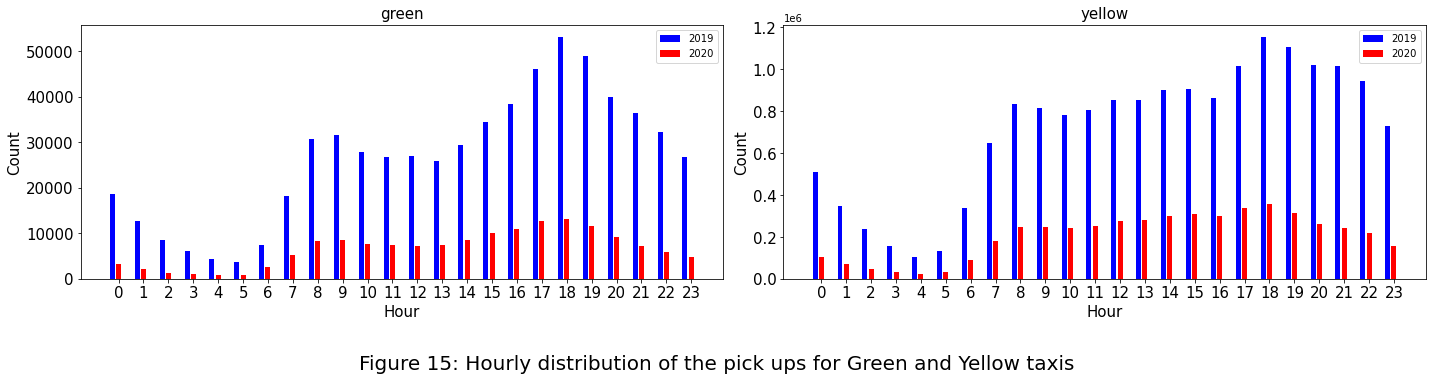

In [ ]:
#Plot hourly distributions of the pick-ups for both types of taxis
c=1
fig=plt.figure(figsize=(20,30))
z= np.arange(0,24)
for x in ['green', 'yellow']:
    ax= plt.subplot(7,2,c)
    taxi1 = data[(data.Year==2019) & (data.type==x)].groupby('pickup_hour').size()
    taxi2 = data[(data.Year==2020) & (data.type==x)].groupby('pickup_hour').size()
    ax.bar(z-0.25, taxi1, width=0.2, color='b', align='center', label="2019")
    ax.bar(z, taxi2, width=0.2, color='r', align='center', label="2020")
    plt.title(x, fontsize=15)
    plt.xlabel('Hour', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(range(0, 24,1), fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    c+=1

plt.suptitle("Figure 15: Hourly distribution of the pick ups for Green and Yellow taxis",x=0.5, y=0.82,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

As it is represented in figure 15, the shape of the distribution for both types of taxis is quite similar. Moreover, the shape also seems to be the same for 2019 and 2020. Obviously, the number of pick ups has decrease in 2020, but people still picked up more taxis during the period of 17-18h and less during the night. Also, due to the curfew, the number of pick up has been dramatically reduce during the night in 2020.

But, at that hours do we have the longer distances? Is it related with the number of pick ups?

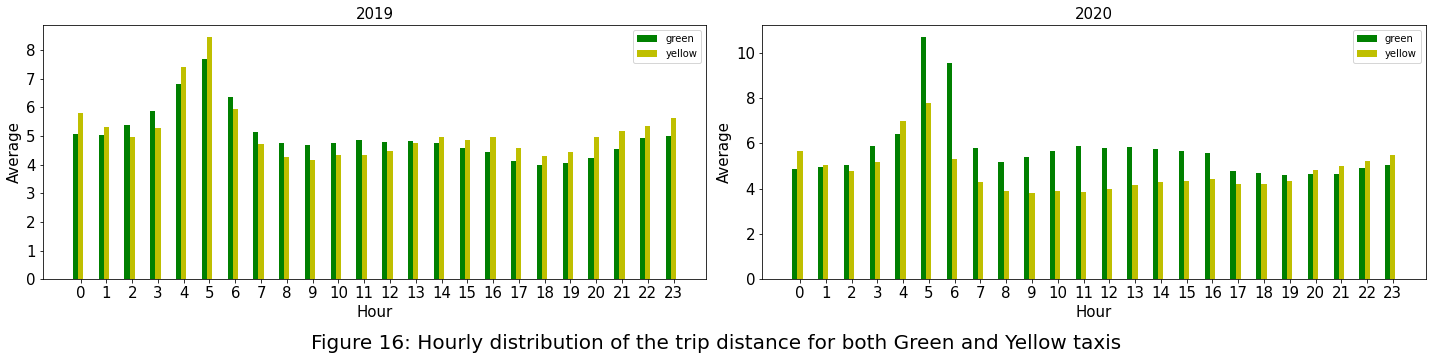

In [ ]:
#Plot hourly distributions of the trip distance for both types of taxis
c=1
fig=plt.figure(figsize=(20,30))
z= np.arange(0,24)
for x in [2019, 2020]:
    ax= plt.subplot(7,2,c)
    taxi1 = data[(data.Year==x) & (data.type=='green')].groupby('pickup_hour')['Trip_distance'].mean()
    taxi2 = data[(data.Year==x) & (data.type=='yellow')].groupby('pickup_hour')['Trip_distance'].mean()
    ax.bar(z-0.2, taxi1, width=0.2, color='g', align='center', label="green")
    ax.bar(z, taxi2, width=0.2, color='y', align='center', label="yellow")
    plt.title(x, fontsize=15)
    plt.xlabel('Hour', fontsize=15)
    plt.ylabel('Average', fontsize=15)
    plt.xticks(range(0, 24,1), fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    c+=1
    
plt.suptitle("Figure 16: Hourly distribution of the trip distance for both Green and Yellow taxis",x=0.5, y=0.83,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

Given figure 16, we are able to compare the average of the distances for both types of taxis at the same time. The most surprising fact for us was that the distances increased for Green taxis during the first months of the pandemic and were even higher than for yellow taxis. One explanation we could imagine is that people tended to take more cabs to make long and unimpressive journeys, such as going to work, that usually they would do by public transport, but in 2020 they were felling more comfortable taking a cab.

As we have pointed out before, the distance is very correlated with the total and the fare amount, but what about the tip amount? Is there some hours when people feel more inclined to tip?

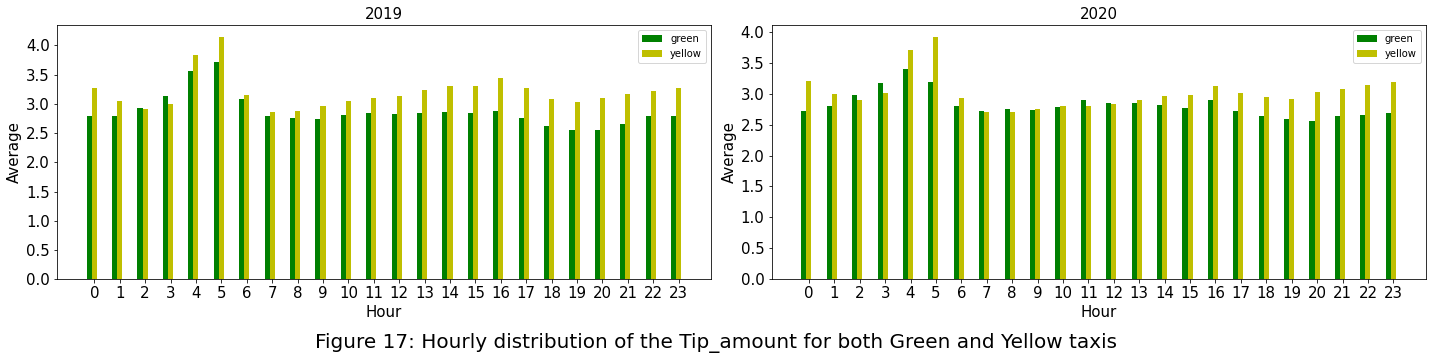

In [ ]:
#Plot hourly distributions of the tip amount for both types of taxis
c=1
fig=plt.figure(figsize=(20,30))
z= np.arange(0,24)
for x in [2019, 2020]:
    ax= plt.subplot(7,2,c)
    taxi1 = data[(data.Year==x) & (data.type=='green')].groupby('pickup_hour')['Tip_amount'].mean()
    taxi2 = data[(data.Year==x) & (data.type=='yellow')].groupby('pickup_hour')['Tip_amount'].mean()
    ax.bar(z-0.2, taxi1, width=0.2, color='g', align='center', label="green")
    ax.bar(z, taxi2, width=0.2, color='y', align='center', label="yellow")
    plt.title(x, fontsize=15)
    plt.xlabel('Hour', fontsize=15)
    plt.ylabel('Average', fontsize=15)
    plt.xticks(range(0, 24,1), fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    c+=1
    
plt.suptitle("Figure 17: Hourly distribution of the Tip_amount for both Green and Yellow taxis",x=0.5, y=0.83,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

First insight: people have the same inclination to tip before and after Corona.

The hours when people gives more tips are around 4-5h, also coinciding with the hours when the journeys are the longest. We can also highlight that tips tend to be a bit higher for yellow taxis intead that for green ones.

### Weekly distributions

The next type of distributions we are goint to explore are the weekly ones.

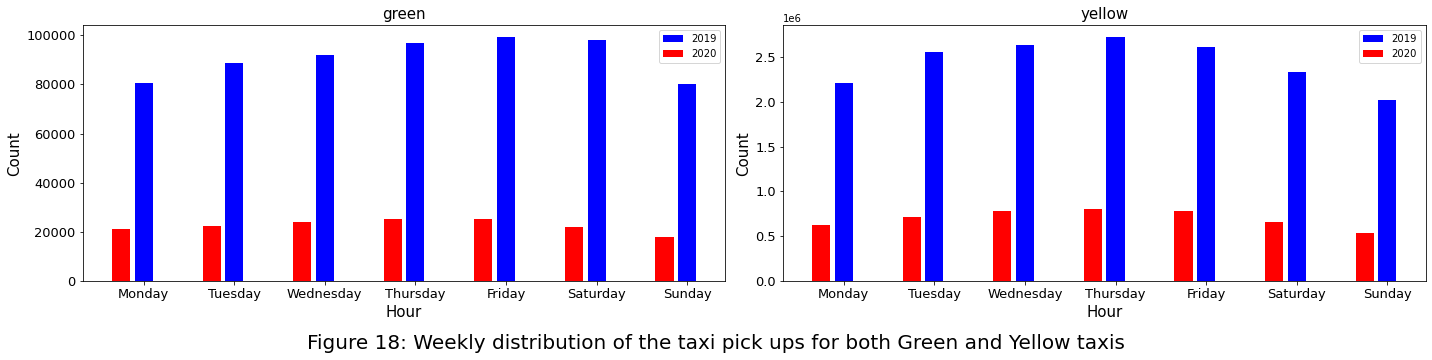

In [ ]:
#Plot weekly distributions of the pick ups for both types of taxis
c=1
fig=plt.figure(figsize=(20,30))
br1 = np.arange(7)
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
data['Day_id'] = data.Day_of_week
data['Day_id'] = data['Day_id'].map(sorterIndex)
for x in ['green', 'yellow']:
    ax= plt.subplot(7,2,c)
    taxi1 = data[(data.Year==2019) & (data.type==x)].groupby('Day_id').size()
    taxi2 = data[(data.Year==2020) & (data.type==x)].groupby('Day_id').size()
    ax.bar(br1, taxi1, width=0.2, color='b', align='center', label="2019")
    ax.bar(br1-0.25, taxi2, width=0.2, color='r', align='center', label="2020")
    plt.title(x, fontsize=15)
    plt.xticks(ticks=np.arange(7),labels=sorter, fontsize=13)
    plt.xlabel('Hour', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.yticks(fontsize=13)
    plt.legend()
    c+=1

plt.suptitle("Figure 18: Weekly distribution of the taxi pick ups for both Green and Yellow taxis",x=0.5, y=0.83,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

Observing figure 18, we realize that people don't tend to take cabs on Sundays. However Thrusdays, Fridays and Saturdays are the days with more taxis rides. This can be due the fact that social events are normally during these days of the week. Also, like in the hourly distribution of the pick ups, the shape of the  distribution it is not affected by the pandemic.

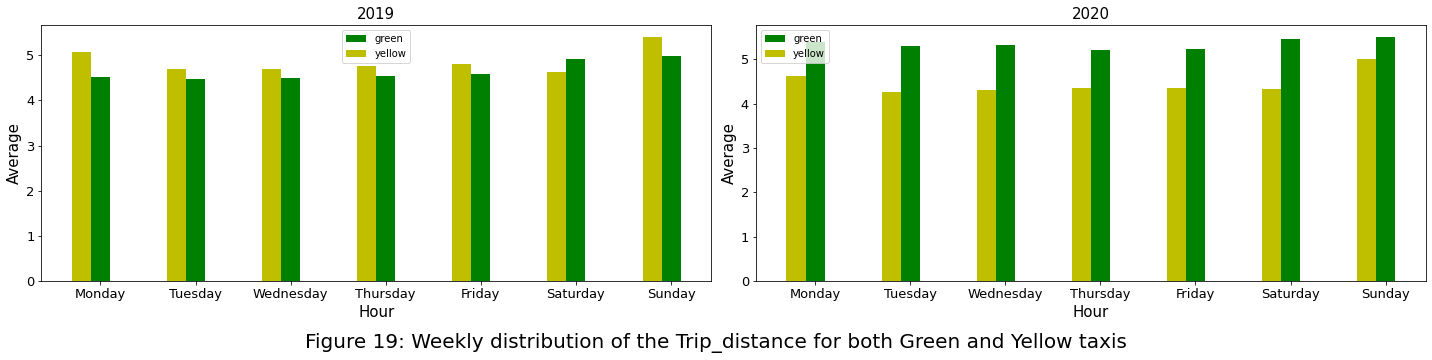

In [ ]:
#Plot weekly distributions of the pick ups for both types of taxis
c=1
fig=plt.figure(figsize=(20,30))
br1 = np.arange(7)
for x in [2019, 2020]:
    ax= plt.subplot(7,2,c)
    taxi1 = data[(data.Year==x) & (data.type=='green')].groupby('Day_id')['Trip_distance'].mean()
    taxi2 = data[(data.Year==x) & (data.type=='yellow')].groupby('Day_id')['Trip_distance'].mean()
    ax.bar(br1, taxi1, width=0.2, color='g', align='center', label="green")
    ax.bar(br1-0.2, taxi2, width=0.2, color='y', align='center', label="yellow")
    plt.title(x, fontsize=15)
    plt.xticks(ticks=np.arange(7),labels=sorter, fontsize=13)
    plt.xlabel('Hour', fontsize=15)
    plt.ylabel('Average', fontsize=15)
    plt.yticks(fontsize=13)
    plt.xticks(ticks=np.arange(7),labels=sorter)
    plt.legend()
    c+=1

plt.suptitle("Figure 19: Weekly distribution of the Trip_distance for both Green and Yellow taxis",x=0.5, y=0.83,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

As we have already observed in another plot, figure 19 shows thath the distances seems to be higher for the green taxis in 2020 and this pattern is almost constant for all the days of the week.

### Daily distributions

Finally, we will plot the daily distribution of the pick ups for both types trips to visualize the general idea we get from our datasets.

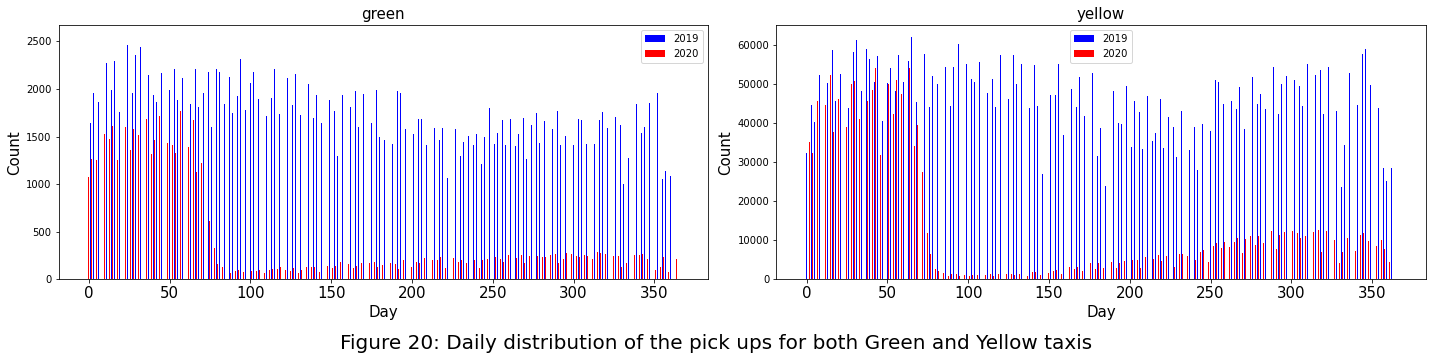

In [ ]:
#Plot daily distributions of the pick ups for both types of taxis
c=1
fig=plt.figure(figsize=(20,30))
z= np.arange(0,365)
for x in ['green', 'yellow']:
    ax= plt.subplot(7,2,c)
    taxi1 = data[(data.Year==2019) & (data.type==x)].groupby('pickup_date').size()
    taxi2 = data[(data.Year==2020) & (data.type==x)].groupby('pickup_date').size()
    ax.bar(np.arange(len(taxi1)), taxi1, width=0.2, color='b', align='center', label="2019")
    ax.bar(np.arange(len(taxi2))-0.25, taxi2, width=0.2, color='r', align='center', label="2020")
    plt.title(x, fontsize=15)
    plt.xlabel('Day', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(fontsize=15)
    plt.legend()
    c+=1
    
plt.suptitle("Figure 20: Daily distribution of the pick ups for both Green and Yellow taxis",x=0.5, y=0.83,ha='center', fontsize=20)
plt.tight_layout()
plt.show()

The shapes of these distributions allows us to see clearly the dramatic jump in the number of taxi rides in the moment the restrictions were imposed in NYC.

As a coclusion of this part, we want to remark that even though the number of taxis rides has decreased dramatically when the corona restrictions started in NYC, the shape of the pick ups distributions didn't almost change for both years, i.e. people have taken fewer cabs during 2020 but the timing and day of the week when people take  the cabs are similar to the ones in 2019.

## Part 3.b: spatial analysis

As further analysis, we decided to study the spatial properties of our datasets. In order to do it, a map has been exploited. In particular, different features of the dataset have been taken into account and the taxi zones on the map have been coloured based on the results.

First of all, the preprocessed dataset is uploaded

In [ ]:
complete_data = pd.read_pickle("data/Complete_data.pkl")

In [ ]:
complete_data.head()

,PULocationID,DOLocationID,Passenger_count,Trip_distance,Fare_amount,Tip_amount,Total_amount,Payment_type,pickup_date,dropoff_date,Month,Year,pickup_hour,dropoff_hour,type,Day
0,66,36,1.0,7.177656,17.5,3.76,22.56,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1
1,255,112,1.0,2.027768,6.0,1.46,8.76,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1
2,82,83,1.0,1.625433,5.5,2.04,8.84,1.0,2019-02-01,2019-02-01,2,2019,0,1,green,1
3,255,112,1.0,1.834648,5.5,1.70,8.50,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1
4,7,7,1.0,1.689807,5.5,2.00,8.80,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1


As it can be seen, there are many features (each column) we could be interested in. The first decision was about the choice of what to study. We decided that the best and most interesting features to study were the number of drop-offs and pick-ups per taxi zone, as well as the average of the trip distance, the average of the different prices and the average number of passengers. Moreover, for each feature, the analysis can be performed in four different conditions: taking into account only taxi of type green, taking into account only taxi of type yellow, taking into account both taxi of type green and yellow (comparing them in the map with different colours) and don't taking into account the type at all (i.e. without separate per type).

The code is already thought for a website version, so the whole analysis is done in a function. The function is commented and all the results will be shown below in the notebook.

In [ ]:
#these are the different options that the user can select.
#in the website, all these options are in a GUI and the function is called through specific callbacks.

#all the different options available for the features. They are both for which feature to take into account...
rows = ["dropoff_date", "pickup_date", "both_pick_and_drop", "Trip_distance", "Fare_amount", "Tip_amount", "Total_amount", "Passenger_count"]

#...and for which to group by
groups = ["DOLocationID", "PULocationID", "both_pick_and_drop", "Trip_distance", "Fare_amount", "Tip_amount", "Total_amount", "Passenger_count"]

types = ["yellow", "green", "both", "none"] #all the different options available for the types

In [ ]:
#given only one type of the taxi, both of them or none of the types of the taxi,
#the feature to study and the date, it returns the dataframe to build the final map
#N.B. that this method mainly uses "get_res" for the case in which only one type of taxi is chosen or none of them
#the difference is when we want to visualise the two colors together, that we have to select which value to show
def get_final_res(color, feature, day, rows = rows, groups = groups, types = types):
    
    # instead of taking only the day selected, the results are averaged over seven day starting from the day selected.
    # this is done to make the results more stable and to average out other factors that we are not considering
    day_obj = datetime.strptime(day, '%Y-%m-%d')
    day_obj_delta = day_obj + timedelta(7)
    
    day_start = str(day_obj.date())
    day_end = str(day_obj_delta.date())
    
    if color == 2: # if we want to show both the types, we have to retrieve the data for both of them separately
        res0 = get_res(0,feature, day_start, day_end, rows, groups, types)
        res0["type"]=types[0]
        res1 = get_res(1,feature, day_start, day_end, rows, groups, types)
        res1["type"]=types[1]
        
        #then merge them together...
        res = pd.merge(res0, res1, how="outer", on="location_id")
        res = res.fillna(0)
        
        #...taking only the maximum between the two values for each zone.
        #In other words, for each zone we have one value for the yellow type and one for the green type...
        #...and we want to take only the maximum between the two...
        res["amount"] = [max(x,y) for x,y in zip(res["amount_x"],res["amount_y"]) ]
        
        #...saving from which type the value came from
        color = []
        for row in range(len(res)):
            if res.iloc[row]["amount_x"] == res.iloc[row]["amount"]:
                color.append(res.iloc[row]["type_x"])
            else: color.append(res.iloc[row]["type_y"])
        res["type"] = color
        res = res.drop(columns=['amount_x','amount_y',"type_x", "type_y"])
        res = res[(res != 0).all(1)]
        return res
    
    else: # in the other cases, the plain "get_res" is just used
        return get_res(color, feature, day_start, day_end, rows, groups, types)

In [ ]:
#given the type of the taxi, the feature to study and the date, it returns the dataframe to build the final map
def get_res(color, feature, day_start, day_end, rows = rows, groups = groups, types = types):
    
    if color == 3: # if we are not taking into account the type of the taxi, we don't want to filter for "type"
        
        if feature > 2:  # if the feature that we are taken into account is...
                         # ...one among "trip_distance", "passengers_count" or one of the prices
            # only the trips in the day selected are taken
            res = complete_data[(complete_data[rows[0]] >= day_start) & (complete_data[rows[0]] < day_end)]
            
            # then they are grouped by the drop-off taxi zone and averaged 
            res = res.groupby(groups[0]).mean()
            
            # finally, only the feature requested is taken
            res = res[groups[feature]]
            
            # it is then converted to a dataframe in the shape needed by the chlorophet function
            res=res.to_frame()
            res["location_id"]=res.index
            res = res.rename(columns={groups[feature]: 'amount'})
            res = res[(res != 0).all(1)]
            return res
        
        elif feature == 2: # if the feature that we are taken into account is...
                           # ...the count of the drop-offs and the pick-ups together
            # filter the data leaving only the selected day till seven days after and take both the drop-offs and the pick-ups
            res0 = complete_data[(complete_data[rows[0]] >= day_start) & (complete_data[rows[0]] < day_end)].groupby(groups[0]).size()//7
            res1 = complete_data[(complete_data[rows[1]] >= day_start) & (complete_data[rows[1]] < day_end)].groupby(groups[1]).size()//7
            
            # merge them together...
            res0 = res0.to_frame()
            res1 = res1.to_frame()
            res0["location_id"]=res0.index
            res1["location_id"]=res1.index
            res = pd.merge(res0, res1, how="outer", on="location_id")
            res = res.fillna(0)
            # ... summing the amount of drop-offs and pick-ups
            res["amount"] = res["0_x"]+res["0_y"]
            res = res[(res != 0).all(1)]
            return res
        
        else: # finally, if the feature is only one between pick-up or drop-off
            
            # filter by date nd group by zone
            res = complete_data[(complete_data[rows[feature]] >= day_start) & (complete_data[rows[feature]] < day_end)].groupby(groups[feature]).size()//7
            
            # and prepare the dataframe for the chlorophet method
            res=res.to_frame()
            res["location_id"]=res.index
            res = res.rename(columns={0: 'amount'})
            res = res[(res != 0).all(1)]
            return res
    
    else: # if instead we want only the type "green" or the type "yellow", we have to filter also by "type"
        #the steps and the cases are exaclty as above, but now the data is filtered also by "type" (green or yellow) 
        if feature > 2:
            res = complete_data[(complete_data[rows[0]] >= day_start) & (complete_data[rows[0]] < day_end) & (complete_data["type"] == types[color])].groupby(groups[0]).mean()[groups[feature]]
            res=res.to_frame()
            res["location_id"]=res.index
            res = res.rename(columns={groups[feature]: 'amount'})
            res = res[(res != 0).all(1)]
            return res
        elif feature == 2:
            res0 = complete_data[(complete_data[rows[0]] == day) & (complete_data["type"] == types[color])].groupby(groups[0]).size()//7
            res1 = complete_data[(complete_data[rows[1]] == day) & (complete_data["type"] == types[color])].groupby(groups[1]).size()//7
            res0 = res0.to_frame()
            res1 = res1.to_frame()
            res0["location_id"]=res0.index
            res1["location_id"]=res1.index
            res = pd.merge(res0, res1, how="outer", on="location_id")
            res = res.fillna(0)
            res["amount"] = res["0_x"]+res["0_y"]
            res = res[(res != 0).all(1)]
            return res
        else:
            res = complete_data[(complete_data[rows[feature]] >= day_start) & (complete_data[rows[feature]] < day_end) & (complete_data["type"] == types[color])].groupby(groups[feature]).size()//7
            res=res.to_frame()
            res["location_id"]=res.index
            res = res.rename(columns={0: 'amount'})
            res = res[(res != 0).all(1)]
            return res

Finally, we are ready to use the functions built to study the spatial properties.

From the temporal analysis we know that there are differences in the number of trips before covid with respect to after covid. We want to see if there are differences also in the spatial distribution.

In the next sections, different combination of days, types of taxi and features will be visualised to analyse and show different properties of the dataset.

In [ ]:
#retrieve the taxi zones as geojson file
with open('data/NYC_Taxi_Zones.geojson') as json_file:
    zones = json.load(json_file)

In [ ]:
#function to generate the map figure
def get_fig(res, color):
    
    #specify the colors to use
    colours = [px.colors.sequential.YlOrBr, px.colors.sequential.algae, "aux", px.colors.sequential.Greys]
    
    #if both the colors are selected, two categories are possible and the colors are categorical
    if color == 2:
        fig = px.choropleth_mapbox(res, geojson=zones, locations='location_id', color='type', #specify the data
                                  featureidkey="properties.location_id",
                                  mapbox_style="carto-positron", #the type of the map
                                  zoom=8.5, center = {"lat": 40.7226, "lon": -73.9788}, #the initial position
                                  opacity=0.3, #the opacity and the colors for the discrete map
                                  color_discrete_map = {"green": "#228B22", "yellow": "#FFD700"},
                                 ) 
    #otherwise, for a single color, a continues scale of color is used
    else :
        fig = px.choropleth_mapbox(res, geojson=zones, locations='location_id', color='amount', #specify the data
                                  featureidkey="properties.location_id",
                                  #range_color=(0,100),
                                  color_continuous_scale = colours[color], #the continuous scale of color
                                  mapbox_style="carto-positron", #the type of the map
                                  zoom=8.5, center = {"lat": 40.7226, "lon": -73.9788}, #the initial position
                                  opacity=0.3,
                                  )
    fig.update_layout(height=300, width=700, margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_geos(fitbounds="locations")
    return fig

First of all, we start analysing the drop-off and the pick-up spatial distributions.

In [ ]:
day1 = "2019-05-05" #choice of the day
color1 = 0 # yellow taxi
feature1 = 0 # drop off location

day2 = "2019-05-05" #choice of the day
color2 = 1 # green taxi
feature2 = 0 # drop off location

In [ ]:
res1 = get_final_res(color1, feature1, day1)
fig1 = get_fig(res1, color1)
#fig1.show() #decomment this line to show the interactive map

res2 = get_final_res(color2, feature2, day2)
fig2 = get_fig(res2, color2)
#fig2.show() #decomment this line to show the interactive map

<center>  Total number of drop-offs for yellow taxi in a day of May 2019 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Total number of drop-offs for green taxi in a day of May 2019  </center>
<table><tr><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/do_yellow.png?raw=true"></td><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/do_green.png?raw=true"></td></tr></table>
<center>Figure: Total number of drop-offs for yellow (left) and green (right) taxi </center>

As it can be seen from the figure above, both yellow and green taxi tend to end their trips around central park and manhattan. This is reasonable because it's the most active part of the city. It's also interesting to see that there is a local maximum at JFK airport (bottom right corner). Finally, from the legend bars is clear that the number of trips for the green taxi is orders of magnitude less than the number for yellow taxi.

In [ ]:
day1 = "2019-05-05" #choice of the day
color1 = 0 # yellow taxi
feature1 = 1 # pick up location

day2 = "2019-05-05" #choice of the day
color2 = 1 # green taxi
feature2 = 1 # pick up location

In [ ]:
res1 = get_final_res(color1, feature1, day1)
fig1 = get_fig(res1, color1)
#fig1.show()  #decomment this line to show the interactive map

res2 = get_final_res(color2, feature2, day2)
fig2 = get_fig(res2, color2)
#fig2.show()  #decomment this line to show the interactive map

<center>  Total number of pick-ups for yellow taxi in a day of May 2019 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Total number of pick-ups for green taxi in a day of May 2019  </center>
<table><tr><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/pu_yellow.png?raw=true"></td><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/pu_green.png?raw=true"></td></tr></table>
<center>Figure: Total number of pick-ups for yellow (left) and green (right) taxi </center>

The pick-up map is even more interesting than the drop-off. In fact, a particular property is visible and it is the fact that the green taxi cannot pick people in certain zones [see https://en.wikipedia.org/wiki/Boro_taxi ]. In particular, green taxi cannot pick passengers in the bottom half of manhattan and in JFK airport, and this is clearly visible from above. Another aspect to look at is the distribution of the pick-ups with respect to the drop-offs. In fact, the figures above show that, differently from the drop-offs, the pick-ups are concentrated in manhattan and in the closeby. This means that the people tend to pick a taxi from the central zones instead of from the periphery, and then stay in the city. Finally, also in this case the green taxi are significantly less present than the yellow.

Then, we know from the temporal analysis that the number of trips decreases significantly from the second quarter of 2020. We want to see if the spatial distribution changed as well. In order to study the differences, the total (yellow and green together) spatial distribution is shown for the same day in 2019 and 2020.

In [ ]:
day1 = "2019-05-05" #choice of the day
color1 = 3 # yellow and green taxi together
feature1 = 2 # pick up and drop off locations

day2 = "2020-05-05" #choice of the day
color2 = 3 # yellow and green taxi together
feature2 = 2 # pick up and drop off locations

In [ ]:
res1 = get_final_res(color1, feature1, day1)
fig1 = get_fig(res1, color1)
#fig1.show()  #decomment this line to show the interactive map

res2 = get_final_res(color2, feature2, day2)
fig2 = get_fig(res2, color2)
#fig2.show()  #decomment this line to show the interactive map

<center>  Amount of drop-offs and pick-ups in a day of May 2019 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Amount of drop-offs and pick-ups in a day of May 2020  </center>
<table><tr><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/do_pu_2019.png?raw=true"></td><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/do_pu_2020.png?raw=true"></td></tr></table>
<center>Figure: Total number of drop-offs and pick-ups for 2019 (left) and 2020 (right)</center>

In the maps above we can see that the distribution of the travels changed. In fact, the amount of trips in May 2020 is around the 3% of the amount of trips of the same day in 2019. It's so clear the relation between the virus and the number of trips. Moreover, also the distribution changed. In 2019 the zones in manhattan are still served whereas almost all the other zones don't have neither pick-ups nor drop-offs.

In the next examples we examine whether the other characteristics as the average_distance of the trips or the total_amount paid have some spatial differences before and after corona virus or not.
First of all, we start by looking at the total average_distance of the trips, comparing a day in 2019 and the same in 2020.

In [ ]:
day1 = "2019-05-05" #choice of the day
color1 = 3 # yellow and green taxi together
feature1 = 3 # average distance

day2 = "2020-05-05" #choice of the day
color2 = 3 # yellow and green taxi together
feature2 = 3 # average distance

In [ ]:
res1 = get_final_res(color1, feature1, day1)
fig1 = get_fig(res1, color1)
#fig1.show()  #decomment this line to show the interactive map

res2 = get_final_res(color2, feature2, day2)
fig2 = get_fig(res2, color2)
#fig2.show()  #decomment this line to show the interactive map

<center>  Average distance of the trips in a day of May 2019 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Average distance of the trips in a day of May 2020  </center>
<table><tr><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/av_dist_2019.png?raw=true"></td><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/av_dist_2020.png?raw=true"></td></tr></table>
<center>Figure: Average distance for the trips in a day of 2019 (left) and 2020 (right)</center>

From the figure above it can be seen that neither the spatial distribution nor the average_distance are affected by the corona. This means that even if the total number of trips have decreased of about 97% (as seen in the plots before), on average the distances covered are the same. This probably means that the nature of the trips are the same and the behaviours of the passengers didn't change, once taken the taxi.

A further analysis that can be done on the distances is to check if the distribution of the average_distance has changed over time for the green and yellow taxi separately. In other words, we want to understand if the maximum average_distance for each zone is covered by a yellow or a green taxi, and if the distribution changed.

In [ ]:
day1 = "2019-05-05" #choice of the day
color1 = 2 # yellow and green taxi separately
feature1 = 3 # max of the average distance

day2 = "2020-05-05" #choice of the day
color2 = 2 # yellow and green taxi separately
feature2 = 3 # max of the average distance

In [ ]:
res1 = get_final_res(color1, feature1, day1)
fig1 = get_fig(res1, color1)
#fig1.show()  #decomment this line to show the interactive map

res2 = get_final_res(color2, feature2, day2)
fig2 = get_fig(res2, color2)
#fig2.show()  #decomment this line to show the interactive map

<center>  Average distance of the trips in a day of May 2019, for type of taxi &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Average distance of the trips in a day of May 2020, for type of taxi  </center>
<table><tr><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/av_dist_gy_2019.png?raw=true"></td><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/av_dist_gy_2020.png?raw=true"></td></tr></table>
<center>Figure: Average distance for the trips in a day of 2019 (left) and 2020 (right), for type of taxi</center>

It can be seen that in 2020 the green taxi did longer trips toward outer buroughs than yellow taxi, comparing 2019 and 2020. At the same time, green taxi lost some zones in the bottom half of manhattan.

Next, we want to explore the same but for the average of the total price.

In [ ]:
day1 = "2019-05-01" #choice of the day
color1 = 2 # yellow and green taxi together
feature1 = 6 # average of total amount paid 

day2 = "2020-05-01" #choice of the day
color2 = 2 # yellow and green taxi together
feature2 = 6 # average of total amount paid

In [ ]:
res1 = get_final_res(color1, feature1, day1)
fig1 = get_fig(res1, color1)
#fig1.show()  #decomment this line to show the interactive map

res2 = get_final_res(color2, feature2, day2)
fig2 = get_fig(res2, color2)
#fig2.show()  #decomment this line to show the interactive map

<center>  Average of the amount paid of the trips in a day of May 2019 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Average of the amount paid of the trips in a day of May 2020  </center>
<table><tr><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/paid_2019.png?raw=true"></td><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/paid_2020.png?raw=true"></td></tr></table>
<center>Figure: Average of the amount paid for the trips in a day of 2019 (left) and 2020 (right)</center>

As before, we can see that also in this case the green taxi expanded their influence in the outer buroughs and lost some zones in manhattan. These last maps are really similar to the ones for the average distance because, as seen before, the total amount paid is really dependent and correlated to the distance covered.

In [ ]:
day1 = "2019-05-05" #choice of the day
color1 = 2 # yellow and green taxi together
feature1 = 7 # average of the number of passenger per trip

day2 = "2020-05-05" #choice of the day
color2 = 2 # yellow and green taxi together
feature2 = 7 # average of the number of passenger per trip

In [ ]:
res1 = get_final_res(color1, feature1, day1)
fig1 = get_fig(res1, color1)
#fig1.show()  #decomment this line to show the interactive map

res2 = get_final_res(color2, feature2, day2)
fig2 = get_fig(res2, color2)
#fig2.show()  #decomment this line to show the interactive map

<center>  Average of the number of passenger per trip in a day of May 2019 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Average of the number of passenger per trip in a day of May 2020  </center>
<table><tr><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/av_pass_2019.png?raw=true"></td><td><img src="https://github.com/GiovanniGr/aux/blob/main/final_proj/av_pass_2020.png?raw=true"></td></tr></table>
<center>Figure: Average of the number of passenger per trip in a day of 2019 (left) and 2020 (right)</center>

In this last plot we can see that there are not big changes in the two years. The green are more present in 2020 than in 2019 but not significantly. In general, on average the yellow taxi picks always more passengers at a time than green taxi.

#### Final considerations
The spatial analysis showed not only that the amount of trips have changed in 2020 after the coronavirus, but also the spatial distribution of, for example, the drop-offs and pick-ups locations. In particular, as expected, the outer regions of the city have been served proportionally less than the inner parts in 2020 with respect to 2019. In addition, the average of the distances of the trips hasn't changed within the inner buroughs. Finally, the green taxi tends to be more present in the outer buroughs in 2020 than in 2019 with respect two yellow taxi.

## Part 3.c: machine learning

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
complete_data = pd.read_pickle("data/Complete_data.pkl")
complete_data.head()

,PULocationID,DOLocationID,Passenger_count,Trip_distance,Fare_amount,Tip_amount,Total_amount,Payment_type,pickup_date,dropoff_date,Month,Year,pickup_hour,dropoff_hour,type,Day
0,66,36,1.0,7.177656,17.5,3.76,22.56,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1
1,255,112,1.0,2.027768,6.0,1.46,8.76,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1
2,82,83,1.0,1.625433,5.5,2.04,8.84,1.0,2019-02-01,2019-02-01,2,2019,0,1,green,1
3,255,112,1.0,1.834648,5.5,1.70,8.50,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1
4,7,7,1.0,1.689807,5.5,2.00,8.80,1.0,2019-02-01,2019-02-01,2,2019,0,0,green,1


At this point, the data has to be changed to fit the further steps. In particular, some features are removed because redundant or not pertinent.

In [ ]:
complete_data = complete_data.drop(columns=['pickup_date',"dropoff_date"])
complete_data["type"] = np.where(complete_data['type'] == "green", 0, complete_data['type'])
complete_data["type"] = np.where(complete_data['type'] == "yellow", 1, complete_data['type'])
complete_data.head()

,PULocationID,DOLocationID,Passenger_count,Trip_distance,Fare_amount,Tip_amount,Total_amount,Payment_type,Month,Year,pickup_hour,dropoff_hour,type,Day
0,66,36,1.0,7.177656,17.5,3.76,22.56,1.0,2,2019,0,0,0,1
1,255,112,1.0,2.027768,6.0,1.46,8.76,1.0,2,2019,0,0,0,1
2,82,83,1.0,1.625433,5.5,2.04,8.84,1.0,2,2019,0,1,0,1
3,255,112,1.0,1.834648,5.5,1.70,8.50,1.0,2,2019,0,0,0,1
4,7,7,1.0,1.689807,5.5,2.00,8.80,1.0,2,2019,0,0,0,1


The idea is to create two balanced sets between green and yellow in order to train the classificator. We decided to balance in order to not give more importance to one type. Moreover, we tried different settings for the categorical and one-hot encodings but none of them had better results than the one with the original data, so we chose to not apply data transformations.

In [ ]:
#balancing and sampling data
num = complete_data[complete_data["type"] == 0].shape[0]
complete_data_sampled = complete_data.groupby('type').sample(n=num, random_state=1)

#dividing into input and output
input = complete_data_sampled.drop(columns=['type'])
output = complete_data_sampled['type']

Then, having the input and the output data, we split them in training and test sets, in order to train the model first and then to check its accuracy.

In [ ]:
#dividing into train and test sets
x_train, x_test, y_train, y_test = train_test_split(input, output, train_size=0.65, test_size=0.35, random_state=1)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

Having the sets ready, the model is created and trained on the training set.

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.oob_score = True
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, oob_score=True, random_state=0)

Finally, the accuracy of the trained model is computed

In [ ]:
y_pred = clf.predict(x_test)
y_pred_train = clf.predict(x_train)
print("Accuracy on categorical data:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy on categorical data on the training set:",metrics.accuracy_score(y_train, y_pred_train))
print("Confusion matrix:",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Oob score:",clf.oob_score_)

Accuracy on categorical data: 0.869939820270404
Accuracy on categorical data on the training set: 0.8716441449514319
Confusion matrix: [[239601  38438]
 [ 33854 243942]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87    278039
           1       0.86      0.88      0.87    277796

    accuracy                           0.87    555835
   macro avg       0.87      0.87      0.87    555835
weighted avg       0.87      0.87      0.87    555835

Oob score: 0.8705136191067586


As it can be seen from the accuracy result, the classifier found a pattern in the data and it is able to distinguish between the two categories with an accuracy of more than 87%.


#### Add weather

At this point, we want to understand if adding the weather data the classifier improves or if the weather data is not meaningful for the classification task. First of all, we upload the data.

In [ ]:
wd = pd.read_pickle("data/weather_2019_2020_NYC.pkl")
wd.head()

,date,time,tempC,windspeedKmph,winddirDegree,weatherCode,weatherDesc,precipMM,humidity,cloudcover
0,2019-01-01,0,10,15,163,308,Heavy rain,12.1,96,100
1,2019-01-01,1,11,16,180,308,Heavy rain,6.1,95,98
2,2019-01-01,2,11,16,198,266,Light drizzle,0.1,93,95
3,2019-01-01,3,12,16,215,266,Light drizzle,0.1,92,93
4,2019-01-01,4,12,18,223,266,Light drizzle,0.1,89,70


Then, as the idea is to merge weather and trips data, the columns of the dataframes to be merged have to be compatible. For this reason, some features are extracted from the date.

In [ ]:
wd["Year"] = pd.to_datetime(wd["date"]).dt.year
wd["Month"] = pd.to_datetime(wd["date"]).dt.month
wd["Day"] = pd.to_datetime(wd["date"]).dt.day
wd["dropoff_hour"] = pd.to_numeric(wd["time"])
wd = wd.drop(columns=["date"])
wd.head()

,time,tempC,windspeedKmph,winddirDegree,weatherCode,weatherDesc,precipMM,humidity,cloudcover,Year,Month,Day,dropoff_hour
0,0,10,15,163,308,Heavy rain,12.1,96,100,2019,1,1,0
1,1,11,16,180,308,Heavy rain,6.1,95,98,2019,1,1,1
2,2,11,16,198,266,Light drizzle,0.1,93,95,2019,1,1,2
3,3,12,16,215,266,Light drizzle,0.1,92,93,2019,1,1,3
4,4,12,18,223,266,Light drizzle,0.1,89,70,2019,1,1,4


As it can be seen from the output above, now the two dataframes can be merged taking the "Year", "Month", "Day" and "Hour". The weather data is hourly so there are no interests in taking a finer time interval. 

In [ ]:
reports_weather = pd.merge(complete_data, wd, how='inner', on=['Year', 'Month','Day','dropoff_hour'])

In [ ]:
#the weather description has to be encoded into numbers
le = preprocessing.LabelEncoder()
reports_weather['weatherDesc'] = le.fit_transform(reports_weather['weatherDesc'])

As done before, the training data is balanced and split into training and test sets. Then the model is trained on the training set and the accuracy is computed on the test set.

In [ ]:
#balancing and sampling data
num = reports_weather[complete_data["type"] == 0].shape[0]
complete_data_sampled = reports_weather.groupby('type').sample(n=num//2, random_state=1) 

#dividing into input and output
input = complete_data_sampled.drop(columns=['type'])
output = complete_data_sampled['type']

#dividing into train and test sets
x_train, x_test, y_train, y_test = train_test_split(input, output, train_size=0.65, test_size=0.35, random_state=1)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

#create the classifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.oob_score = True

#train the classifier
clf.fit(x_train, y_train)

#compute and print the accuracy
y_pred = clf.predict(x_test)
y_pred_train = clf.predict(x_train)
print("Accuracy on categorical data:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy on categorical data on the training set:",metrics.accuracy_score(y_train, y_pred_train))
print("Confusion matrix:",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Oob score:",clf.oob_score_)

Accuracy on categorical data: 0.8513872846929119
Accuracy on categorical data on the training set: 0.8552809267414668
Confusion matrix: [[116782  22154]
 [ 19148 119833]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85    138936
           1       0.84      0.86      0.85    138981

    accuracy                           0.85    277917
   macro avg       0.85      0.85      0.85    277917
weighted avg       0.85      0.85      0.85    277917

Oob score: 0.8520724389738265


The classifier has not improved with the weather data. In fact, the accuracy is even less than for the case before. This means that the weather is not meaningful for the classifier. This could be also intuitively expected because the weather data could affect for example the amount of trips or the average distance of the trips but intuitively there are no differences for the two categories. Said in other words, the weather affects the trips of both yellow and green taxi in the same way, and so it's not useful for finding a meaningful classification. Contrarily, the accuracy decreases and this is probably due to the overfitting of the training data. 

Moreover, it is possible to see which features are the most useful in order to keep only them. This is done in the following.

In [ ]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(complete_data_sampled.drop('type', axis = 1).columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: PULocationID         Importance: 0.54
Variable: Total_amount         Importance: 0.14
Variable: DOLocationID         Importance: 0.09
Variable: Trip_distance        Importance: 0.07
Variable: Fare_amount          Importance: 0.06
Variable: Passenger_count      Importance: 0.04
Variable: Tip_amount           Importance: 0.03
Variable: Month                Importance: 0.01
Variable: pickup_hour          Importance: 0.01
Variable: dropoff_hour         Importance: 0.01
Variable: time                 Importance: 0.01
Variable: Payment_type         Importance: 0.0
Variable: Year                 Importance: 0.0
Variable: Day                  Importance: 0.0
Variable: tempC                Importance: 0.0
Variable: windspeedKmph        Importance: 0.0
Variable: winddirDegree        Importance: 0.0
Variable: weatherCode          Importance: 0.0
Variable: weatherDesc          Importance: 0.0
Variable: precipMM             Importance: 0.0
Variable: humidity             Importance: 0.0
Va

As expected, none of the weather features are taken into account by the classifier. Moreover, it can be seen that also the time features are not so important. The same considerations done for the weather are valid also for the time. It's true that the time influences the trips, but it's also true that doesn't influence differently the green and the yellow trips and for this reason it's not a meaningful feature for the classifier. Then, again as expected, the most meaningful feature is the Pick Up location. This was expected from the spatial analysis as the green taxi have reserved zones and this information creates pattern in the data that the classifier is able to understand. Finally, also the information related to the prices are useful, and this means that there is a difference in the prices of the two different types.

The purpose of this section is to build a classifier to use in the website to predict the type of the taxi that would do the trip specified. The fact that some features are not necessary is an advantage also for user usability. As there will be less features in the model, the user has to specify also less inputs. The goal of the next section is to simplify as much as possible the model and to get a good accuracy.

Following the importance results, the location and price features has decided to be left. In particular, both pick-up and drop-off locations are left. For the price feature, the tip_amount is left.

In [ ]:
model_data = complete_data[["PULocationID", "DOLocationID", "Total_amount", "type"]]
model_data.head()

,PULocationID,DOLocationID,Total_amount,type
0,66,36,22.56,0
1,255,112,8.76,0
2,82,83,8.84,0
3,255,112,8.50,0
4,7,7,8.80,0


Then, the same procedure of balancing, splitting into training and test set, training and testing the accuracy is performed.

In [ ]:
#balancing and sampling data
num = model_data[model_data["type"] == 0].shape[0]
model_data_sampled = model_data.groupby('type').sample(n=num, random_state=1) #'sample' requires at least pandas 1.1.0

#dividing into input and output
input = model_data_sampled.drop(columns=['type'])
output = model_data_sampled['type']

#dividing into train and test sets
x_train, x_test, y_train, y_test = train_test_split(input, output, train_size=0.65, test_size=0.35, random_state=1)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

#train the model
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.oob_score = True
clf.fit(x_train, y_train)

#compute and show the accuracy
y_pred = clf.predict(x_test)
y_pred_train = clf.predict(x_train)
print("Accuracy on categorical data:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy on categorical data on the training set:",metrics.accuracy_score(y_train, y_pred_train))
print("Confusion matrix:",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Oob score:",clf.oob_score_)

Accuracy on categorical data: 0.883506796081571
Accuracy on categorical data on the training set: 0.8845962705240815
Confusion matrix: [[248362  29677]
 [ 35074 242722]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88    278039
           1       0.89      0.87      0.88    277796

    accuracy                           0.88    555835
   macro avg       0.88      0.88      0.88    555835
weighted avg       0.88      0.88      0.88    555835

Oob score: 0.8829736220323696


The accuracy this time is higher then before and this is promising. The goal now is to find the best parameters for the model. A grid search so is performed in a subset of the data.

In [ ]:
from sklearn.model_selection import GridSearchCV

#balancing and sampling data
num = model_data[model_data["type"] == 0].shape[0]
#only a subset of the data is taken for the grid search
model_data_sampled = model_data.groupby('type').sample(n=num//100, random_state=1) 

#dividing into input and output
input = model_data_sampled.drop(columns=['type'])
output = model_data_sampled['type']

#dividing into train and test sets
x_train, x_test, y_train, y_test = train_test_split(input, output, train_size=0.65, test_size=0.35, random_state=1)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

param_grid = {'n_estimators': [200, 250, 300],
              'max_depth': [10, 100, 200],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 3, 5]}

grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, verbose=0, n_jobs=-1)

grid.fit(x_train, y_train)

best_model = grid.best_estimator_

grid.best_params_ # Displays the best parameters

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

Finally, we can use the best parameters found in order to build the framework for the best tree classificator. 

In [ ]:
#balancing and sampling data
num = model_data[model_data["type"] == 0].shape[0]
model_data_sampled = model_data.groupby('type').sample(n=num, random_state=1) 

#dividing into input and output
input = model_data_sampled.drop(columns=['type'])
output = model_data_sampled['type']

In [ ]:
#dividing into train and test sets
x_train, x_test, y_train, y_test = train_test_split(input, output, train_size=0.65, test_size=0.35, random_state=1)
y_train=y_train.astype('int')
y_test=y_test.astype('int')
clf = RandomForestClassifier(max_depth=100, random_state=0, min_samples_leaf=1,min_samples_split=5,n_estimators=250)
clf.oob_score = True
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred_train = clf.predict(x_train)
print("Accuracy on categorical data:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy on categorical data on the training set:",metrics.accuracy_score(y_train, y_pred_train))
#print("Accuracy on test data with {0} encoded:".format(columns),metrics.accuracy_score(y_test, y_pred))
#print("Accuracy on training data:",metrics.accuracy_score(y_train, y_pred_training))
print("Confusion matrix:",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Oob score:",clf.oob_score_)

Accuracy on categorical data: 0.9749332085960761
Accuracy on categorical data on the training set: 0.9862079721931329
Confusion matrix: [[273552   4487]
 [  9446 268350]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    278039
           1       0.98      0.97      0.97    277796

    accuracy                           0.97    555835
   macro avg       0.98      0.97      0.97    555835
weighted avg       0.98      0.97      0.97    555835

Oob score: 0.9748891513112453


As it can be seen from the accuracy above, we improved significantly the performances of the classificator, that from an accuracy of about 88% reached one of more than 97%.

#### Final considerations

The results given by the classificator are in line with those expected. In fact, neither the time nor the hour influenced the classification. This is proven by the accuracy of the classificator that doesn't increase having those features but, on the opposite, increases when leaving only the features related with the positions and with the costs. It was expected also intuitively as factors as time and weather can affect the amount of trips or the number of passengers but they don't affect whether a trip is performed by a green or a yellow taxi. Moreover, the pick-up location is the most important feature because the green taxi cannot pick from some zones and so the trips that start from those locations are easily classified by the tree algorithm.

In [ ]:
#pickle.dump( clf, open( "best_model_2.pkl", "wb" ) )

# Part 4: Genre

For our website, we chose to employ 'slide show' as a genre where we are able to integrate graphs and annotated information, as well as maps, by following a consistent structure that engages the user and also allows for interaction.

Concerning the different tools we employed for our visualization, for the 'Visual Narrative', e.i, the visual features that help the user to understand the narrative, the first category is 'Visual structuring', which refers to all the mechanisms that create an overall structure of the narrative, so the audience can also identify their position. In this category, we employed a 'Consistent Visual Platform' which means a common layout that changes only slightly throughout the sections and engages the viewers to go through the whole story. Secondly, 'Highlighting' are the visual mechanisms that capture the audience attention to particular elements, in our site web we opt to make a'Feature Distinction' to some dates in the timeline as they bear significant importance in our story that and we want to highlight them for the user. The third element of Visual narrative is called 'Transition guidance' and it helps moving the view attention from one scene to another. We added individual tabs at the top of our website to allow the user to move with freedom through the different sections.

On the other hand, 'Narrative structure' are the features that facilitate the consistency of the narrative. The first category is the 'Ordering' in which the different elements appear, we chose to employ the 'user-directed path', where is the user himself who selects a kind of visualization between maps, histograms or machine learning. The second category is 'Interactivity', i.e, how the user can manipulate the visualization. Here, we allow the user for 'Details on demand' and 'Filtering', in all the three types of graphs. Finally, the third element is 'Messaging' ,i.e how to communicate comments to the user, we insert some 'Annotations' as well as some 'Headlines' to expresss the main idea of our visualization.

# Part 5: Visualizations

For the temporal analysis part, we have chosen to visualize most of the data in bar charts.

They are a good visualization technique for this part of the analysis because they allow the user to discover the evolution of the data against time in a clear way. On the other hand, since we have two different types of taxis and two different years to analyze, we often chose grouped bar charts, where we plot numeric values for levels of two categorical variables instead of one. By doing this, we show the time evolution, as well, the difference between both years or both types of cabs in a single graph.

For the spatial analysis part, the most intuitive visualisation tool to use was a map. We combined a regular choropleth map and overlaid geojson data over it to highlight all the taxi zones in the city. In particular, three different maps have been generated. The first type represented only one type of taxi at a time. The second represented the statistics without taking care about the type of taxi, so taking the trips in general. The third, instead, took both the type of taxi and was made to show the differences of the zones of influence.

Finally, the machine learning part didn't use particular visualisation tools, because the results given by the analysis, in our case, were always and only the accuracies of our models, or the importances of the features.

# Part 6: Discussion

The temporal visualizations showed some interesting patterns that helped us better understand the use of the cabs in NYC before and during Covid-19. As we have mentioned before, even if the number of trips has decreased for obvious reasons, the hourly and weekly use of cabs has remained very similar overall for the both years. On the other hand, we number of passanger per taxi has reduced in 2020 and the trip distances of the Green taxis has increased after March 2020.

Among the things that we could have done better is that our analysis could have been improved if we had found more data for VHFs and could have included them in the analysis. Also, during the data cleaning, we found quite a few negative values in the different prices and we lost information by having to remove them. Another possible solution could have been to attribute the change sign to a registration error, and keep them in the dataset after a change of sign.

In the spatial analysis, many things went well and we acquired a lot of experiences and techniques as how the geojson is organized and how to use plotly. Moreover, the visualisations are intuitive and the results are meaningful, showing many aspects of the city which were not possible to get from the raw data. The combinations of the features, the types of taxi and the types of visualisations created many different maps. The parts that could be improved would be e.g. including the interactive maps instead of the pictures. This was done because we faced compatibility problems and we wanted to be sure that everyone could have seen the results without running the whole notebook. Another possible improvement could have been to show also histograms as for the temporal analysis, but with the taxi zones in the x axis. This has not been done both for length reason, as the notebook is already long, and for clarity and coherence reasons. These histograms could have shown some features with respect to the taxi zone, but they would have been less intuitive and they wouldn't have taken the same amount of spatial information as a map.

The machine learning part gave us additional proof that there are some underlying patterns to the data. Many intuitive aspects have been proven and some of the results were expected. Eventually we ended up with a precise model, considering the possible randomness of the data. We improved the model of about 10% and we used many useful technics as a sort of feature selection and the grid search for the best parameters. One aspect in which the machine learning part could have been improved, would have been by trying other different classificators models as for example svm technics or deep learning. This was though above the purposes of the course. Although the study we have done has brought to light many interesting aspects to understand the correlations and where the greatest variance in our dataset lies, perhaps it would have been of greater interest to a user to have predicted other aspects, such as the cost of a journey given input location. However, this has not been done because the aim of the machine learning part was focused on studying deeply the patterns of the dataset rather than focusing on the possibilities of machine learning given our datasets.

The website could have been improved by including more plots and giving the user yet increased selection of features to visualize. The website could additionally benefit from more text and annotations that could bring an overall more smooth experience to the user. Moreover, particular events in the historical timeline of COVID-19 in NYC could have been highlighted even further and some calculations could have been done to show the changes exactly around those dates. 

# Part 7: Contributions

Everyone contributed to the final work in a balanced way and all parts were discussed, designed and analysed together, integrating all parts and making them coherent.

In particular, though, Giovanni focused more on the spatial analysis and on the machine learning parts, also writing the code and the respective sections on the notebook.

In the case of Lorena, she spent more time working on the preprocessing of the data, the correlation and temporal analysis, and also writing the code and the respective sections on the notebooks.

Ewa created and deployed the website and contributed to the relevant parts of the notebook.